# **Project 3 - Typhoons**

In this project, we dealt with typhoons. Actually, we worked on a database which gave us especially sea surface temperature (SST), time, latitude and longitude from 1998 to 2015. 

Firstly, we worked on the following zone: 120 < lon < 145 and 20 < lat < 40. However, after some researches on the Internet and on the database, we decided to study typhoons on a zone further south. That's why we worked on the following zone: 120 < lon < 145 and 8 < lat < 28.
 

### **Before starting**

We need to install Basemap. 

In [ ]:
!pip install basemap

     |████████████████████████████████| 858 kB 5.1 MB/s 
     |████████████████████████████████| 30.5 MB 1.3 MB/s 
     |████████████████████████████████| 219 kB 71.1 MB/s 
     |████████████████████████████████| 6.3 MB 58.5 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=b13eb533f1929cf56d0c9c02b57ce8d7e910e073aaef4821b98ae21692225ab6
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


**Import libraries:**

- matplotlib (2D plotting)
- pylab (scientific computing)
- basemap (plotting 2D data on maps)
- scikit-learn (machine learning)
- pandas (data structures and data analysis tools)

In [ ]:
%matplotlib inline
%pylab inline
from mpl_toolkits.basemap import Basemap
import sklearn
import pandas as pd
from scipy.stats.mstats import zscore
import warnings
warnings.filterwarnings("ignore") # disable warnings
pylab.rcParams['figure.figsize']=(20,20) # graph size

Populating the interactive namespace from numpy and matplotlib


**Declare functions:**
- plot_im (plot satellite image with geographic coordinates)
- plot_ts (plot time series)
- plot2d_labels

In [ ]:
# function to plot images  
def plot_im(lon,lat,im,size_points,var_name):
    
    # transform to arrays (just in case)
    lon=array(lon)
    lat=array(lat)
    im=array(im)
    
    if max(lon)-min(lon)<100:
      # Mercator projection (for small zone)
      m=Basemap(projection='merc',llcrnrlat=nanmin(lat),urcrnrlat=nanmax(lat),\
                llcrnrlon=nanmin(lon),urcrnrlon=nanmax(lon),lat_0=(nanmax(lat)+nanmin(lat))*0.5,\
                lon_0=(nanmax(lon)+nanmin(lon))*0.5,resolution='l')
    else:
      # Orthogonal projection (for large zone)
      m=Basemap(projection='ortho',lat_0=0,lon_0=0,resolution='l')
    # you can use other projections (see https://matplotlib.org/basemap/users/mapsetup.html)
    
    # transform (lon,lat) to (x,y)
    x,y=m(lon,lat)

    # plot
    im=ma.masked_where(isnan(im),im)
    res=m.scatter(x,y,size_points,im,'o',alpha=1,cmap='jet',lw=0)
    m.drawcoastlines()
    m.fillcontinents()
    parallels = linspace(nanmin(lat),nanmax(lat),15)
    meridians = linspace(nanmin(lon),nanmax(lon),15)
    #m.drawparallels(parallels,labels=[1,0,0,1],fontsize=10)
    #m.drawmeridians(meridians,labels=[1,0,0,1],fontsize=10)
    cb=m.colorbar(res,location="right")
    cb.set_label(var_name,fontsize=15)
    
# function to plot time series
def plot_ts(time,ts,line_type,var_name):

    # plot
    plot_date(time,ts,line_type)
    xlabel('Time',fontsize=15)
    ylabel(var_name,fontsize=15)

  

In [ ]:
min_lon, max_lon = 120, 145
min_lat, max_lat = 20, 40
min_year, max_year = 1998,2015
def plot2d_labels(X, labels, cluster_centers=np.empty(()), dpi=80, kmarkersize=10):
    """Create figure with a scatter plot of X colored by 'labels'"""
#     fig, ax = plt.subplots(nrows=1, ncols=1, figsize=plt.figaspect(0.6), dpi=90, facecolor='w', edgecolor='k')
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi=dpi, facecolor='w', edgecolor='k')

    unique_labels = np.unique(labels)
    n_clusters_ = unique_labels.shape[0]
    colors = sns.husl_palette(n_clusters_)

    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k

        plt.plot(X[class_members,0], X[class_members,1], '.',
                 markerfacecolor=tuple(col), markeredgecolor='none', label='Class %i'%(k))

        if len(cluster_centers.shape)>0:
            plt.plot(cluster_centers[k,0], cluster_centers[k,1], 'X', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=kmarkersize, label='Class center #%i'%(k))

    plt.axis('equal')
    plt.xlabel('dimension 1')
    plt.ylabel('dimension 2')
    plt.title('Number of clusters: %i' % n_clusters_)
    plt.legend()
    return fig, ax, colors

**Connection to the GCP:**

First, we have to connect to the Google Cloud Platform. using the following command. Enter the login "bigdataocean2020@gmail.com" and password "bdoimt2022". Do it only once. We will maybe need an authentication: contact me at pierre.tandeo@imt-atlantique.fr or on Discord.

In [ ]:
from google.colab import auth
auth.authenticate_user()

### **Using the average**

In [ ]:
%%bigquery --project alert-ground-261008 output1
SELECT time, dayofyear, month, AVG(sst) AS mean_sst
FROM bdo2020.bdo2020.1998_2015_withtimes
WHERE lon>125 AND lon<145 AND lat>10 AND lat<25
GROUP BY time, dayofyear, month
ORDER BY time

In [ ]:
%%bigquery --project alert-ground-261008 seasonal_cycle
SELECT dayofyear, AVG(sst) AS mean_sst
FROM bdo2020.bdo2020.1998_2015_withtimes
WHERE lon>125 AND lon<145 AND lat>10 AND lat<25
GROUP BY dayofyear
ORDER BY dayofyear

In [ ]:
variation

array([ 0.05681818,  0.07381562,  0.05985915, ..., -0.0853073 ,
       -0.05918694, -0.00195262])

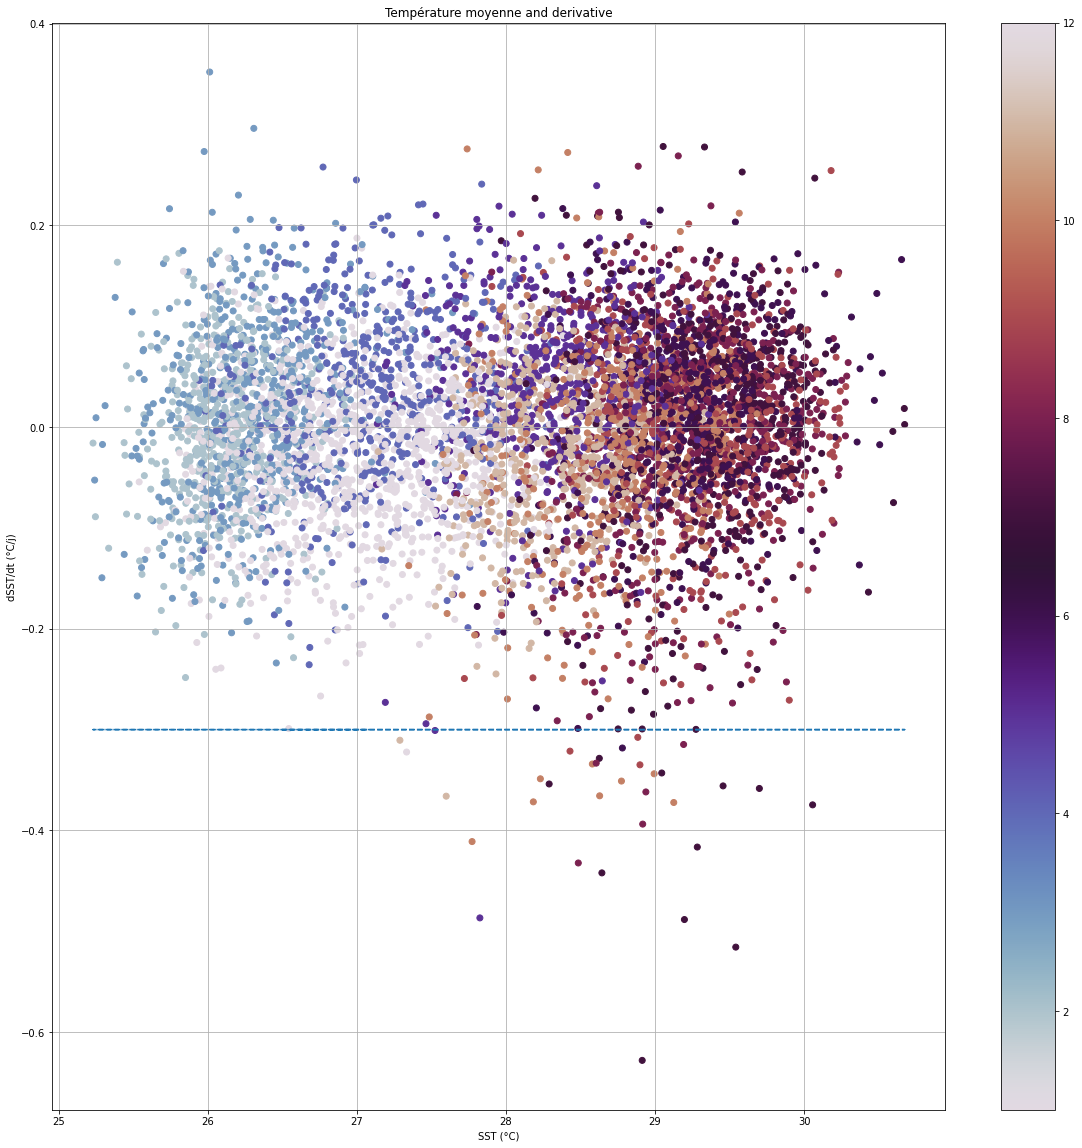

In [ ]:
import datetime
variation = np.diff(output1.mean_sst)
plt.scatter(output1.mean_sst[1:],variation/np.diff(output1.time), c = output1.month[1:],cmap = 'twilight')
plt.colorbar()
plt.plot(output1.mean_sst, np.ones(len(variation)+1)*-.3,'--')
plt.ylabel('dSST/dt (°C/j)')
plt.xlabel('SST (°C)')
plt.title('Température moyenne and derivative')
plt.grid()

Text(0.5, 1.0, 'Potential Typhoons depending on the month between 1998 and 2014 (using avg)')

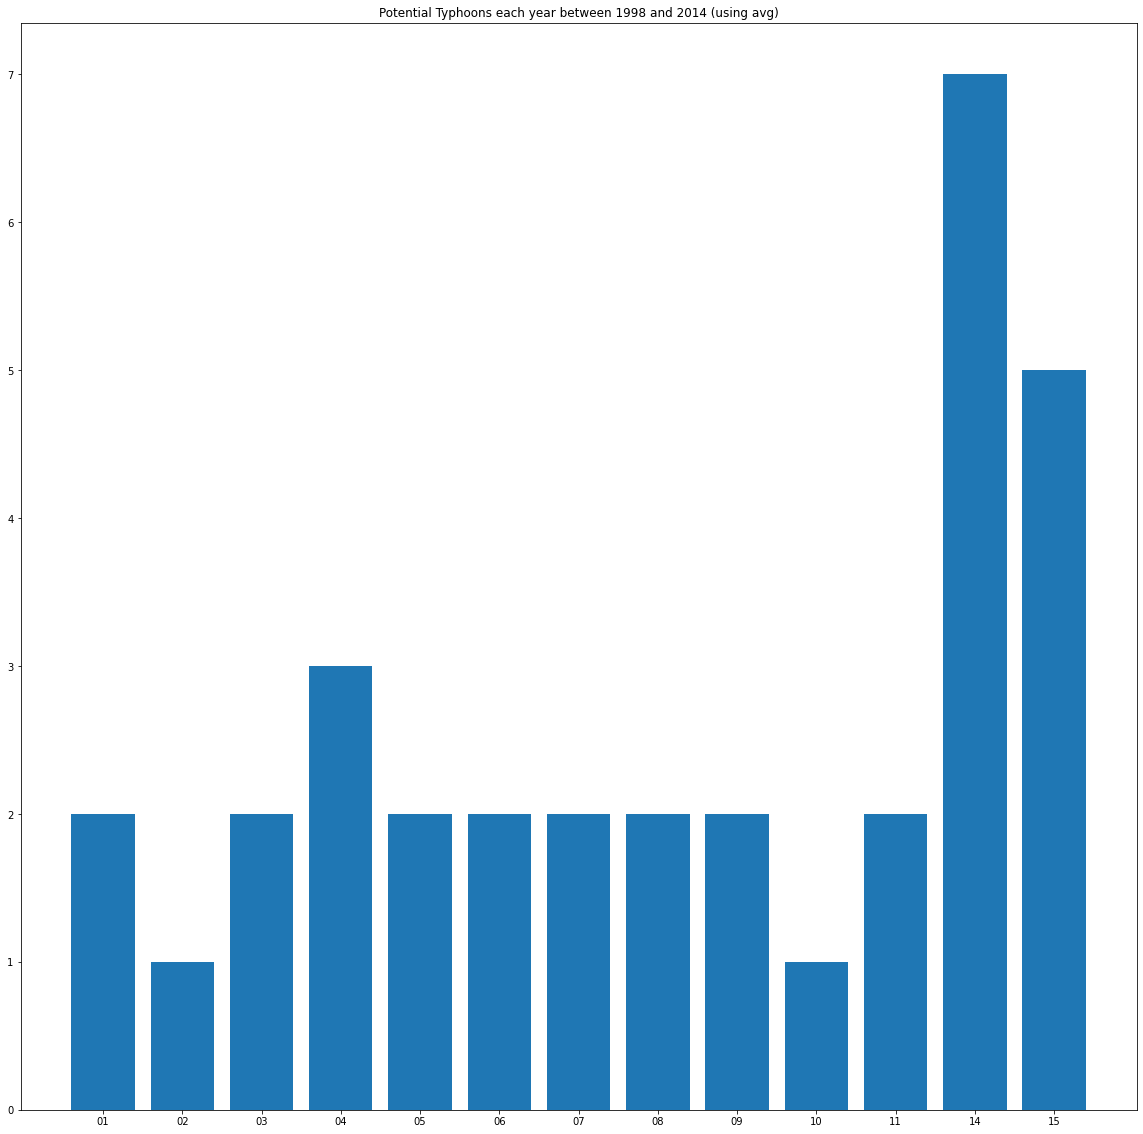

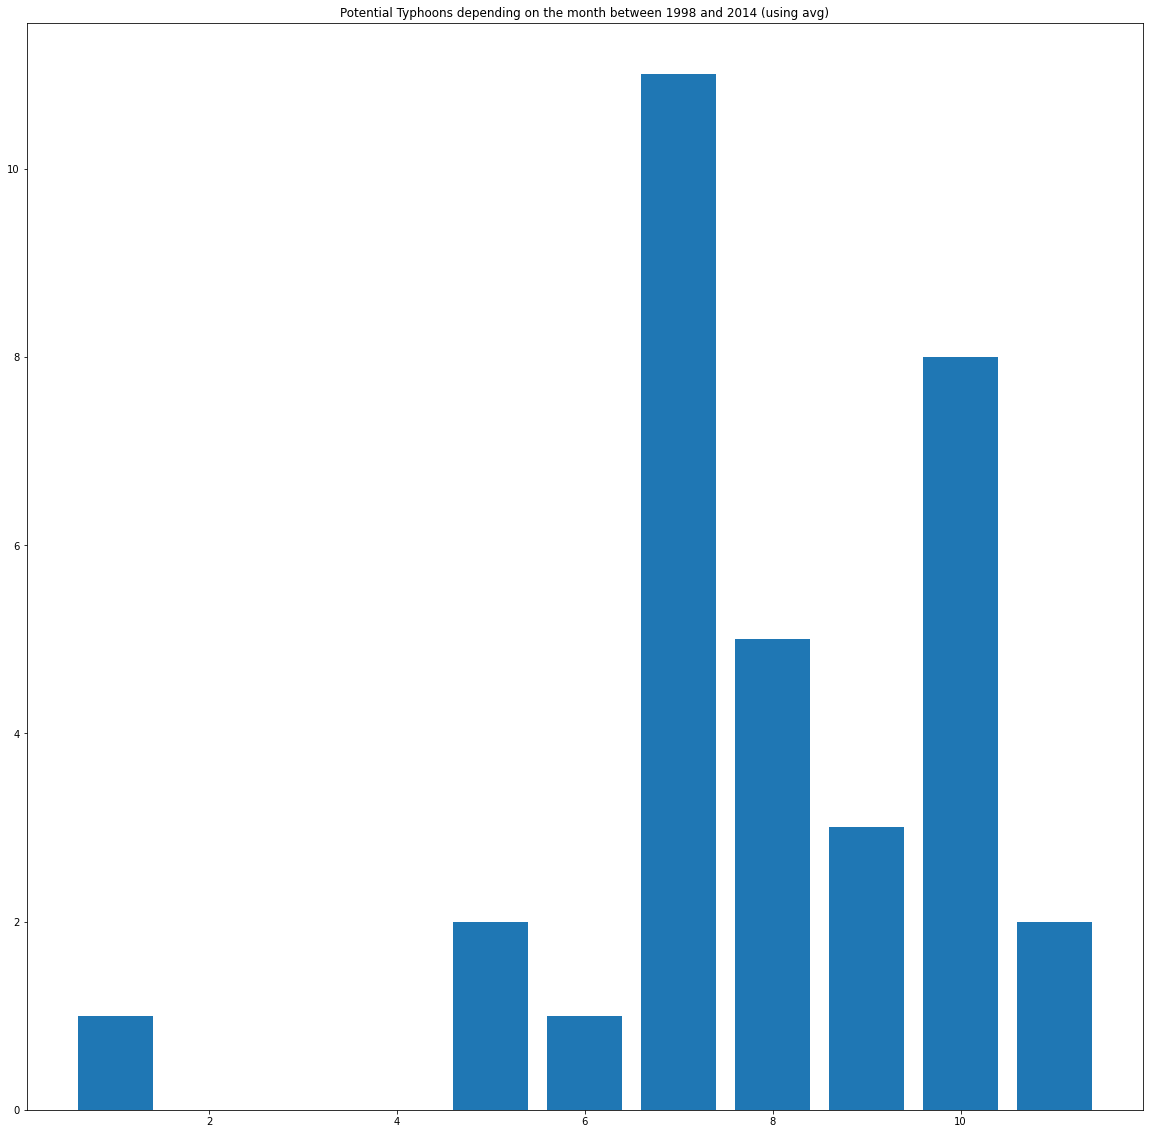

In [ ]:
# maybe_typhoons = output1.time[np.where(np.logical_and(np.logical_and(variation<-0.3,output1.month[1:] >0),output1.month[1:] < 13))[0]]
maybe_typhoons = output1.time[np.where(variation<-0.3)[0]]
# print(maybe_typhoons)
maybe_typhoons_month = output1.month[np.where(variation<-0.3)[0]]

# print(np.transpose([datetime.date.fromordinal(int(d)).strftime("%d/%m/%y") for d in maybe_typhoons]))
labels, counts = np.unique([datetime.date.fromordinal(int(d)).strftime("%y") for d in maybe_typhoons], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Potential Typhoons each year between 1998 and 2014 (using avg)')
plt.figure()
labels, counts = np.unique([int(m) for m in maybe_typhoons_month], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Potential Typhoons depending on the month between 1998 and 2014 (using avg)')

In [ ]:
maybe_typhoons_list = output1.time[np.where(variation<-0.3)[0]].tolist()

maybe_typhoons_consecutif_2jours = [];
for i in range (len(maybe_typhoons_list) - 1) :
  if int(maybe_typhoons_list[i]) == int(maybe_typhoons_list[i + 1] - 1) :
    #s = str('({}, {})'.format(int(maybe_typhoons_list[i]), int(maybe_typhoons_list[i + 1])));
    list_jours = [int(maybe_typhoons_list[i]), int(maybe_typhoons_list[i + 1])]
    maybe_typhoons_consecutif_2jours.append(list_jours)

typhoons_consecutif_2jours = maybe_typhoons_consecutif_2jours.copy()
maybe_typhoons_consecutif_3jours = []
for i in range (len(maybe_typhoons_consecutif_2jours) - 1) :
  if (maybe_typhoons_consecutif_2jours[i][1]) == (maybe_typhoons_consecutif_2jours[i + 1][1] - 1) :
    list_jours = [maybe_typhoons_consecutif_2jours[i][0], maybe_typhoons_consecutif_2jours[i + 1][1]]
    maybe_typhoons_consecutif_3jours.append(list_jours)
    typhoons_consecutif_2jours.remove(maybe_typhoons_consecutif_2jours[i])
    typhoons_consecutif_2jours.remove(maybe_typhoons_consecutif_2jours[i + 1])

#for i in range(len(typhoons_consecutif_2jours)-1) :
#  typhoons_consecutif_2jours[i] = datetime.date.fromordinal(int(typhoons_consecutif_2jours[i])).strftime("%d/%m/%y")

for i in range(len(maybe_typhoons_consecutif_3jours)) :
  maybe_typhoons_consecutif_3jours[i] = datetime.date.fromordinal(i + 1).strftime("%d/%m/%y")

typhoons_consecutif_2jours
table_jours_consecutifs_typhons = np.array([("Variation de + 0.3 sur 2 jour consécutifs", typhoons_consecutif_2jours)])

newrow = ["Variation de + 0.3 sur 3 jours consécutifs", maybe_typhoons_consecutif_3jours]
table_jours_consecutifs_typhons = numpy.vstack([table_jours_consecutifs_typhons, newrow])

# # newrow = ["3 jours consécutifs", []]
# # table_jours_consecutifs_typhons = numpy.vstack([table_jours_consecutifs_typhons, newrow])

print(table_jours_consecutifs_typhons)

[['Variation de + 0.3 sur 2 jour consécutifs'
  list([[731544, 731545], [731868, 731869], [732585, 732586], [732867, 732868], [733172, 733173], [734333, 734334], [735507, 735508], [735513, 735514], [735813, 735814], [735827, 735828]])]
 ['Variation de + 0.3 sur 3 jours consécutifs' list(['01/01/01'])]]


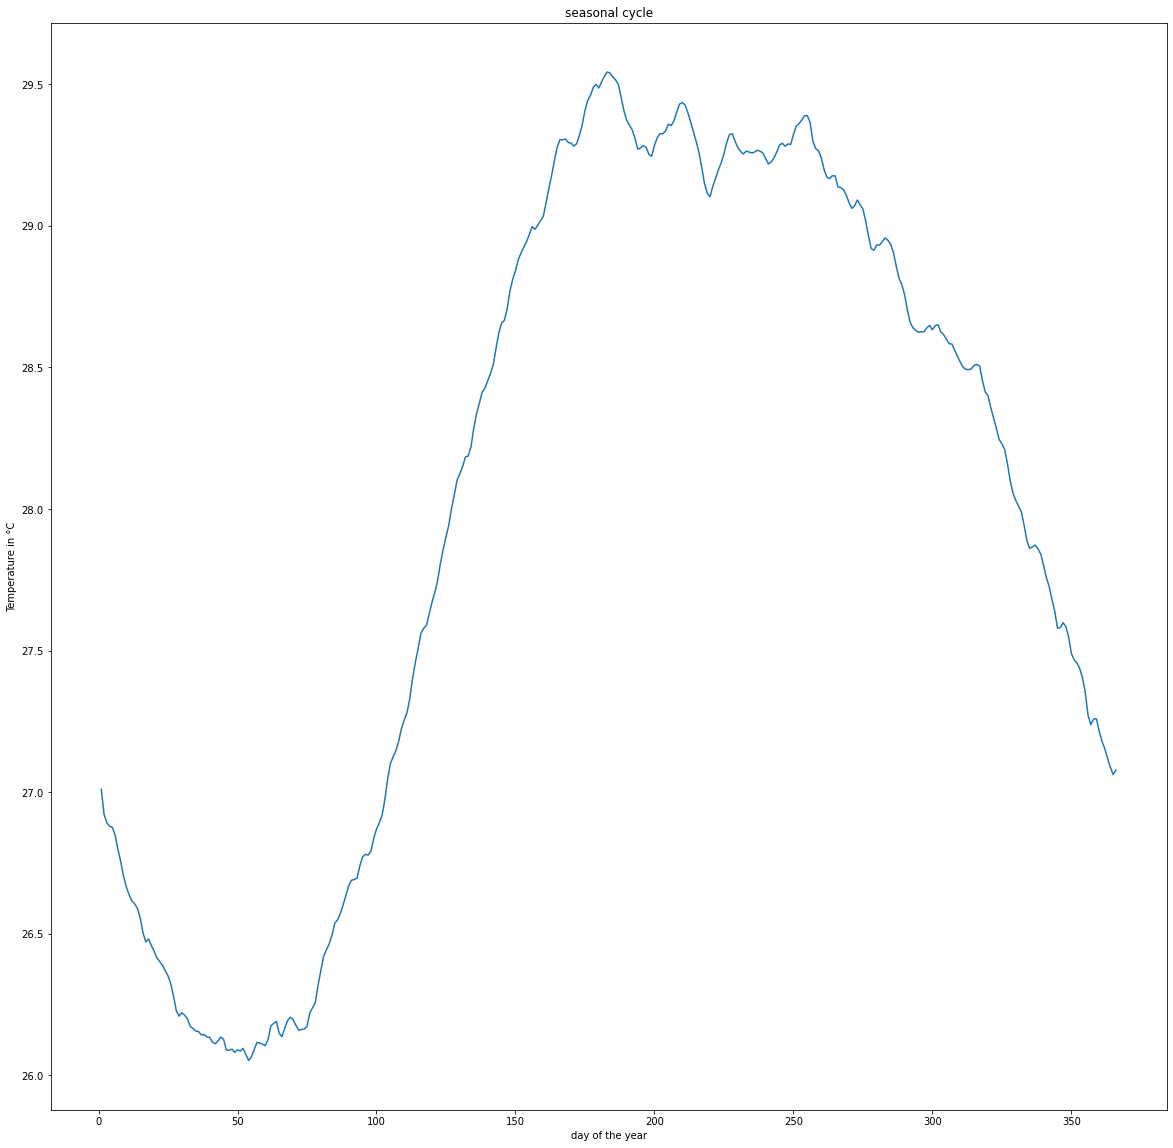

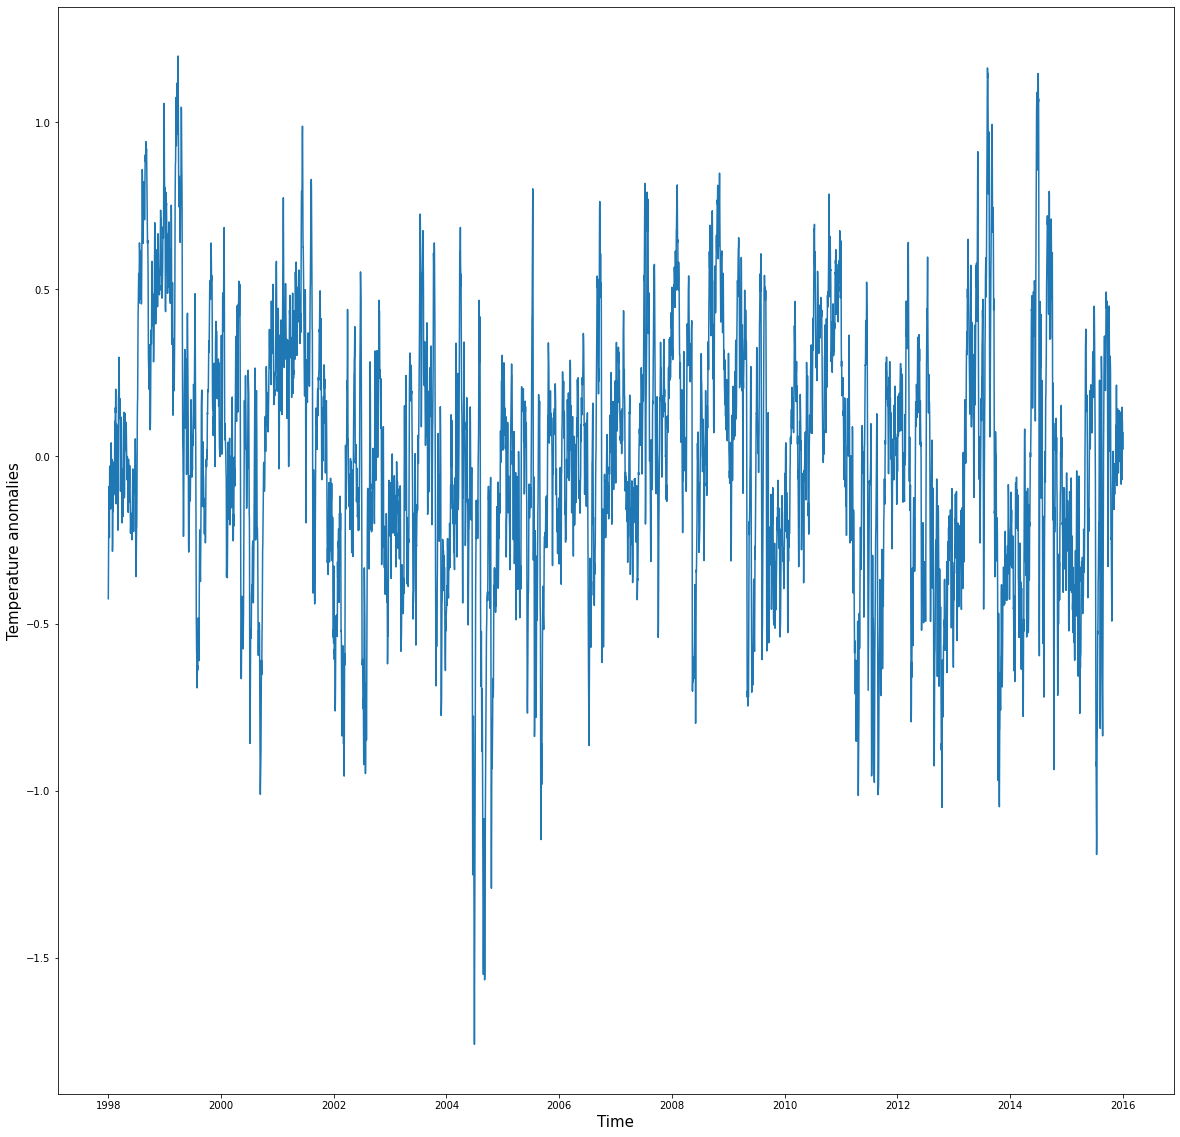

In [ ]:
sst_wo_seasons =[]
plt.figure()
plt.plot(seasonal_cycle.dayofyear, seasonal_cycle.mean_sst,'-')
plt.title('seasonal cycle')
plt.xlabel('day of the year')
plt.ylabel('Temperature in °C')
for j in range(len(output1.mean_sst)):
  sst_wo_seasons.append(output1.mean_sst[j] - seasonal_cycle.mean_sst[np.where(seasonal_cycle.dayofyear == output1.dayofyear[j])[0]])
sst_wo_seasons = np.array(sst_wo_seasons)
plt.figure()
plot_ts(output1.time,sst_wo_seasons,'-','Temperature anomalies')

[[-0.42570245]
 [-0.33965536]
 [-0.25331484]
 ...
 [ 0.0528667 ]
 [ 0.02098627]
 [ 0.07081733]]


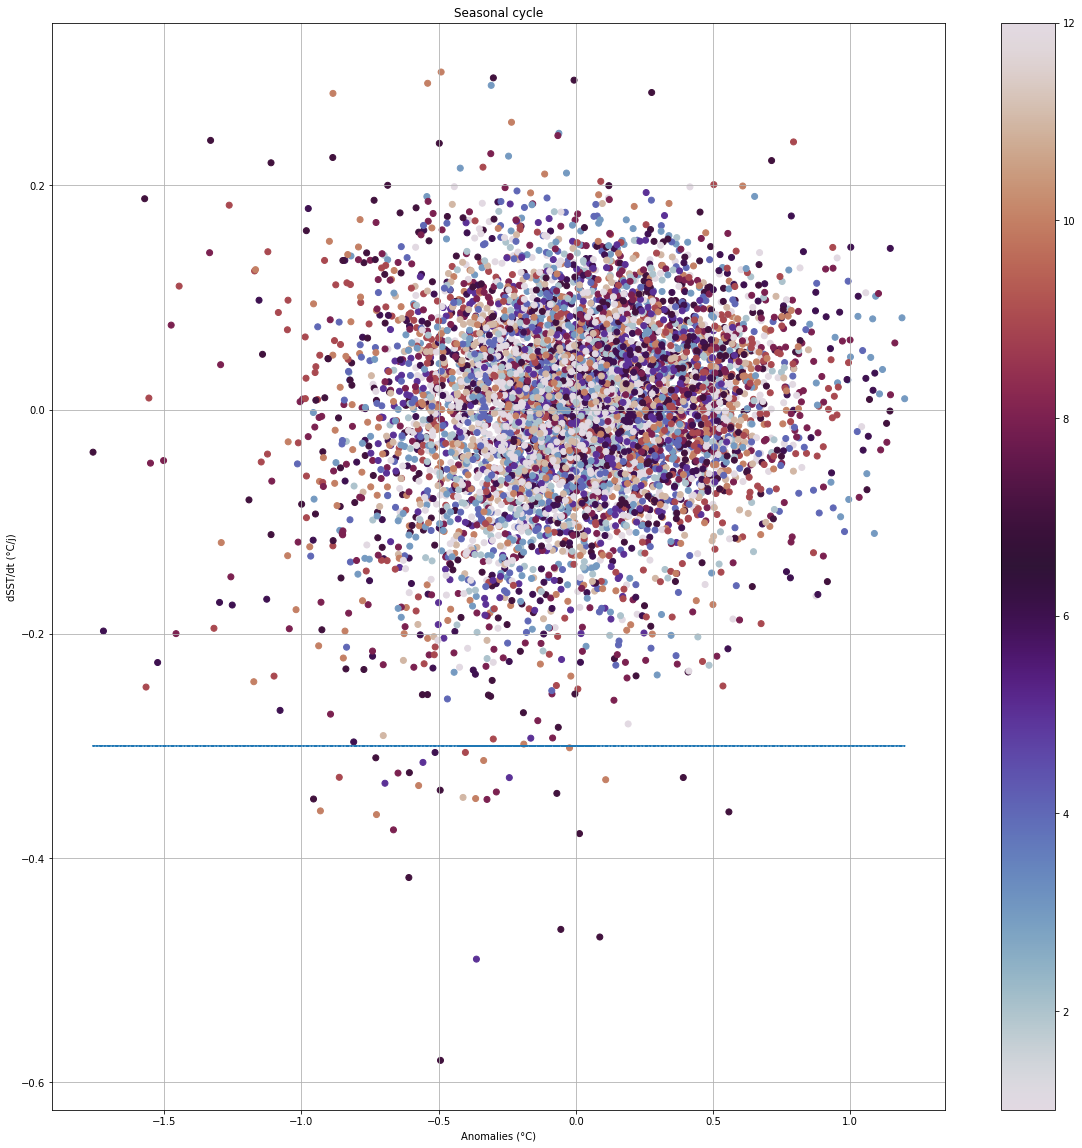

In [ ]:
variation_season_mean = np.diff(sst_wo_seasons.T)
print(sst_wo_seasons)
# print(np.shape(sst_wo_seasons[1:]),np.shape(variation_season),np.shape(np.diff(output1.time)))
plt.scatter(sst_wo_seasons[1:],variation_season_mean, c = output1.month[1:],cmap = 'twilight')
plt.colorbar()
plt.plot(sst_wo_seasons, np.ones(len(sst_wo_seasons))*-.3,'--')
plt.ylabel('dSST/dt (°C/j)')
plt.xlabel('Anomalies (°C)')
plt.title('Seasonal cycle')
plt.grid()

Text(0.5, 1.0, 'Potential Typhoons depending on the month between 1998 and 2014 (using avg and the seasonal cycle)')

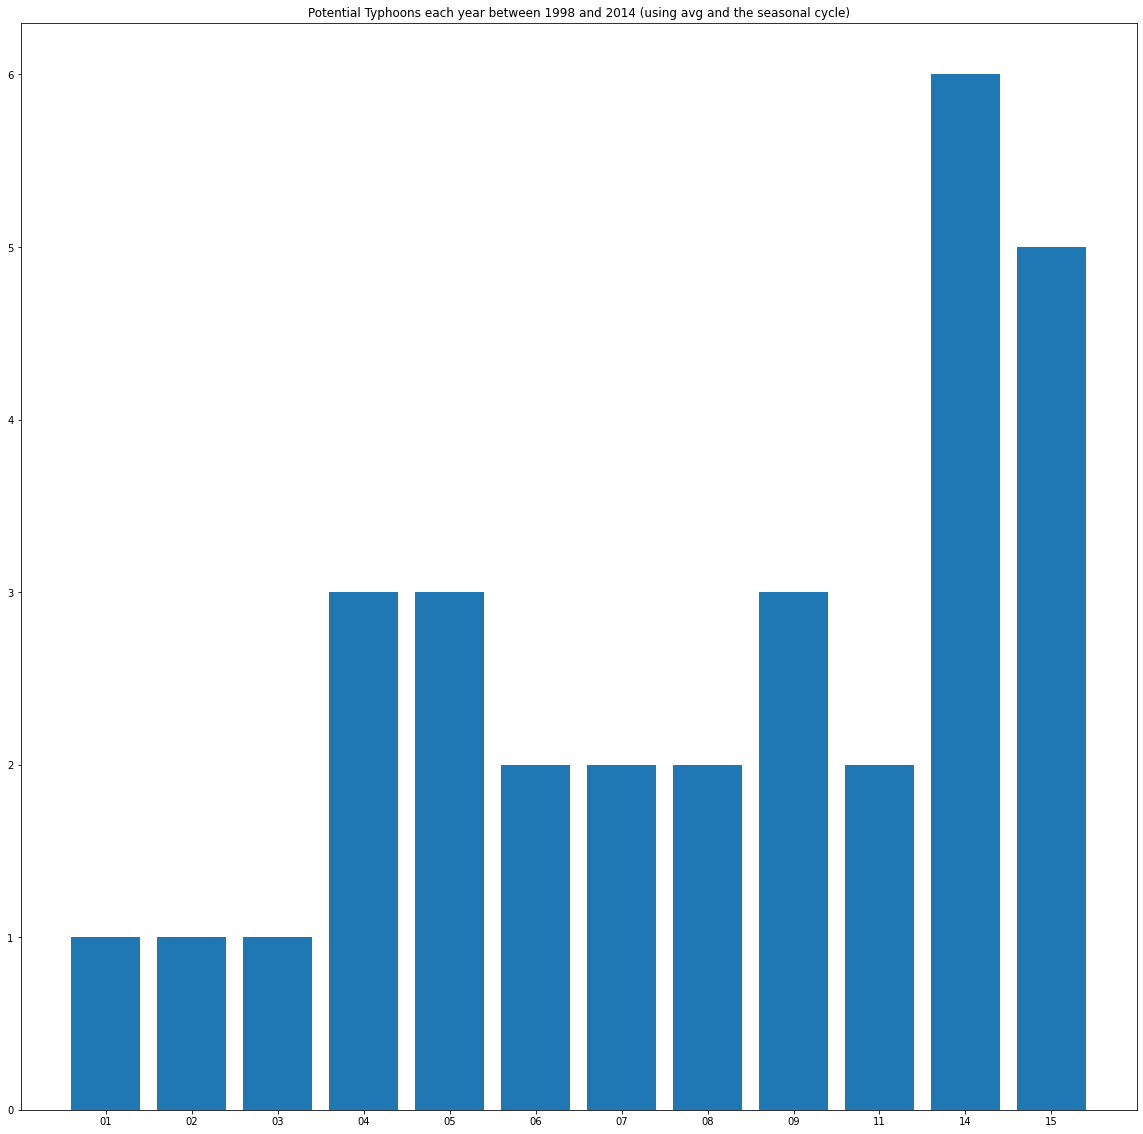

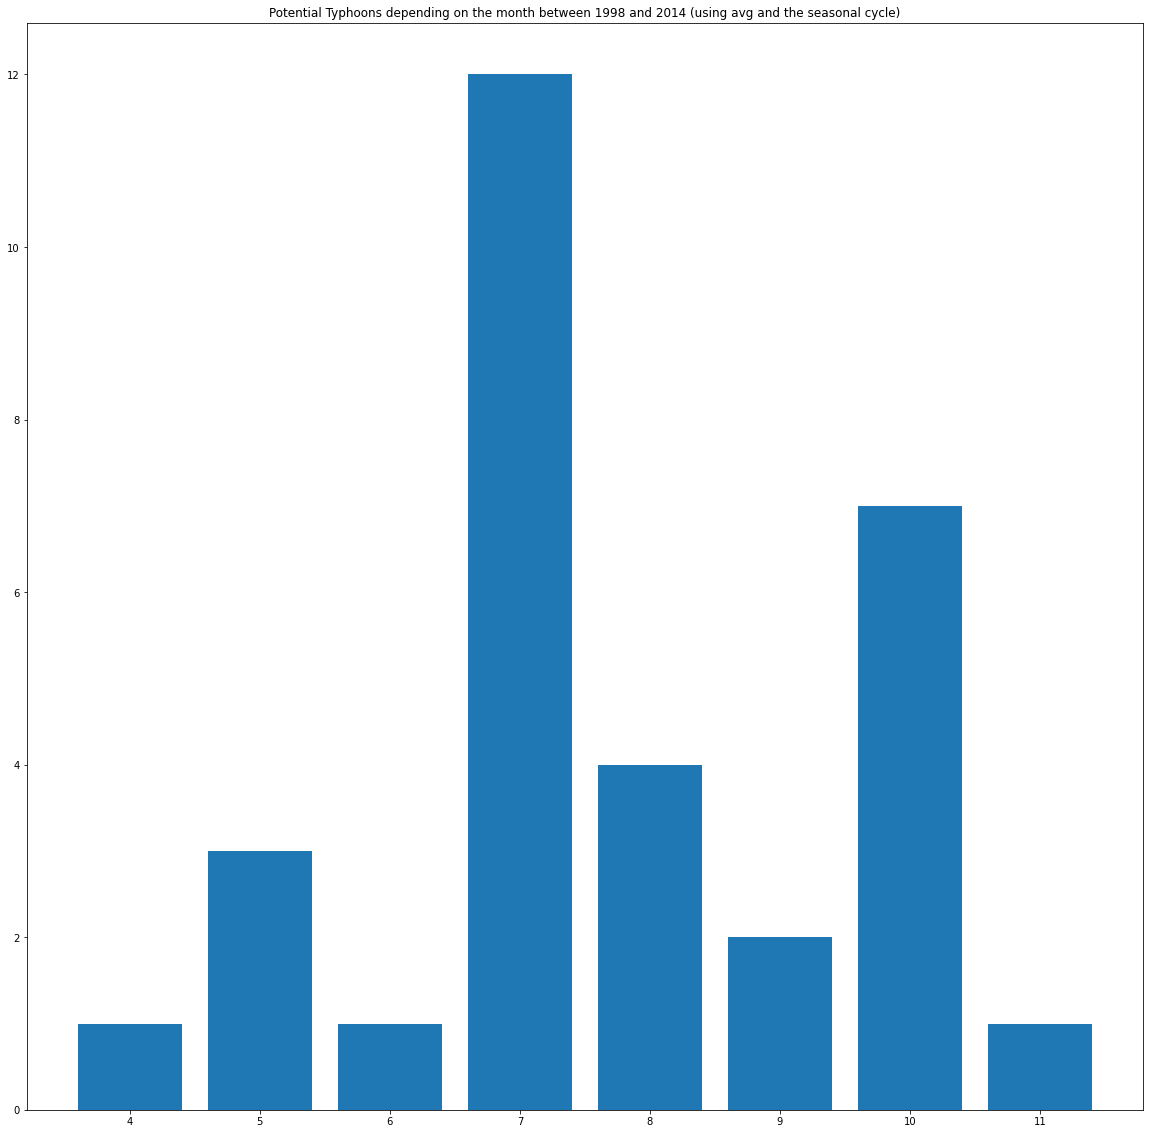

In [ ]:
maybe_typhoons = output1.time[np.where(variation_season_mean<-0.3)[1]]
maybe_typhoons_month = output1.month[np.where(variation_season_mean<-0.3)[1]]
# print(maybe_typhoons)
# print(np.transpose([datetime.date.fromordinal(int(d)).strftime("%d/%m/%y") for d in maybe_typhoons]))
labels, counts = np.unique([datetime.date.fromordinal(int(d)).strftime("%y") for d in maybe_typhoons], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Potential Typhoons each year between 1998 and 2014 (using avg and the seasonal cycle)')
plt.figure()
labels, counts = np.unique([int(m) for m in maybe_typhoons_month], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Potential Typhoons depending on the month between 1998 and 2014 (using avg and the seasonal cycle)')

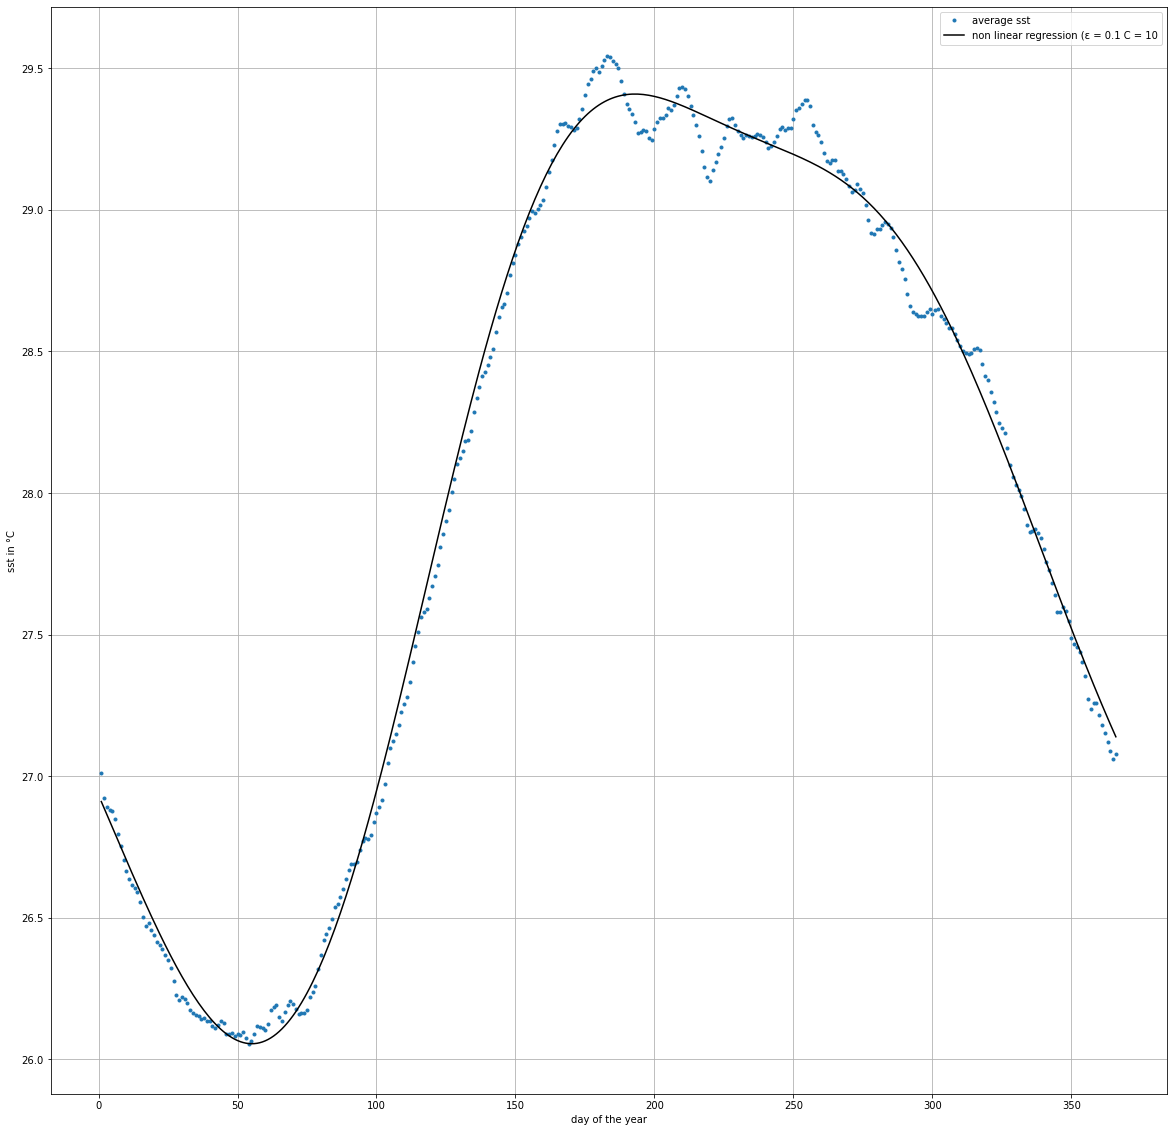

In [ ]:
from sklearn.svm import SVR
# specify epsilon: the half-width of the "corridor" of data around the fitted line
epsilon = .1
# specify the regularisation parameter, C:
C=10
t = seasonal_cycle.dayofyear
y = seasonal_cycle.mean_sst
# set up and fit the model
model=SVR(C=C, epsilon=epsilon).fit(t[:,None],y)

# predict values of ŷ
y_hat=model.predict(t[:,None])

# plot the results
plt.plot(t,y,'.', label ='average sst')
plt.plot(t,y_hat,'k-',label = 'non linear regression (ε = {} C = {}'.format(epsilon,C))
plt.xlabel('day of the year')
plt.ylabel('sst in °C')
plt.legend()
plt.grid()

In [ ]:
sst_minus_reg =[]
for j in range(len(output1)):
  sst_minus_reg.append(output1.mean_sst[j] - y_hat[int(output1.dayofyear[j])-1])
sst_minus_reg = np.array(sst_minus_reg)
plt.figure()
plot_ts(output1.time,sst_minus_reg,'-','Anomalies using a non-linear regression')

In [ ]:
variation_reg_mean = np.diff(sst_minus_reg)
# print(np.shape(sst_wo_seasons[1:]),np.shape(variation_season),np.shape(np.diff(output1.time)))
plt.scatter(sst_minus_reg[:-1],variation_reg_mean, c = output1.month[:-1],cmap = 'twilight')
plt.colorbar()
plt.plot(sst_minus_reg, np.ones(len(sst_minus_reg))*-.25,'--')
plt.ylabel('dSST/dt (°C/j)')
plt.xlabel('Anomalies (°C)')
plt.title('Non linear regression')
plt.grid()


In [ ]:
maybe_typhoons_reg = [output1.time[i+1] for i in np.where(variation_reg_mean<-0.25)[0]]
maybe_typhoons_reg_month = [output1.month[i+1] for i in np.where(variation_reg_mean<-0.25)[0]]
labels, counts = np.unique([datetime.date.fromordinal(int(d)).strftime("%y") for d in maybe_typhoons_reg], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Potential Typhoons each year between 1998 and 2014 (using avg and a non linear regression)')
plt.figure()
labels, counts = np.unique([int(m) for m in maybe_typhoons_reg_month], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Potential Typhoons depending on the month between 1998 and 2014 (using avg and a non linear regression)')

In [ ]:
variation_season = sst_wo_seasons[1:] - sst_wo_seasons[:-1]
# print(np.shape(sst_wo_seasons[1:]),np.shape(variation_season),np.shape(np.diff(output1.time)))
plt.scatter(sst_wo_seasons[1:],variation_season, c = output1.month[1:],cmap = 'twilight')
plt.colorbar()
plt.plot(sst_wo_seasons, np.ones(len(sst_wo_seasons))*-.3,'--')
plt.ylabel('dSST/dt (°C/j)')
plt.xlabel('SST (°C)')
plt.grid()

### **Using the STD**

In [ ]:
%%bigquery --project alert-ground-261008 output_std
SELECT time, dayofyear, month, STDDEV(sst) AS std_sst
FROM bdo2020.bdo2020.1998_2015_withtimes
WHERE lon>125 AND lon<145 AND lat>10 AND lat<25
GROUP BY time, dayofyear, month
ORDER BY time

In [ ]:
%%bigquery --project alert-ground-261008 seasonal_std
SELECT dayofyear, STDDEV(sst) AS std_sst
FROM bdo2020.bdo2020.1998_2015_withtimes
WHERE lon>125 AND lon<145 AND lat>10 AND lat<25
GROUP BY dayofyear
ORDER BY dayofyear

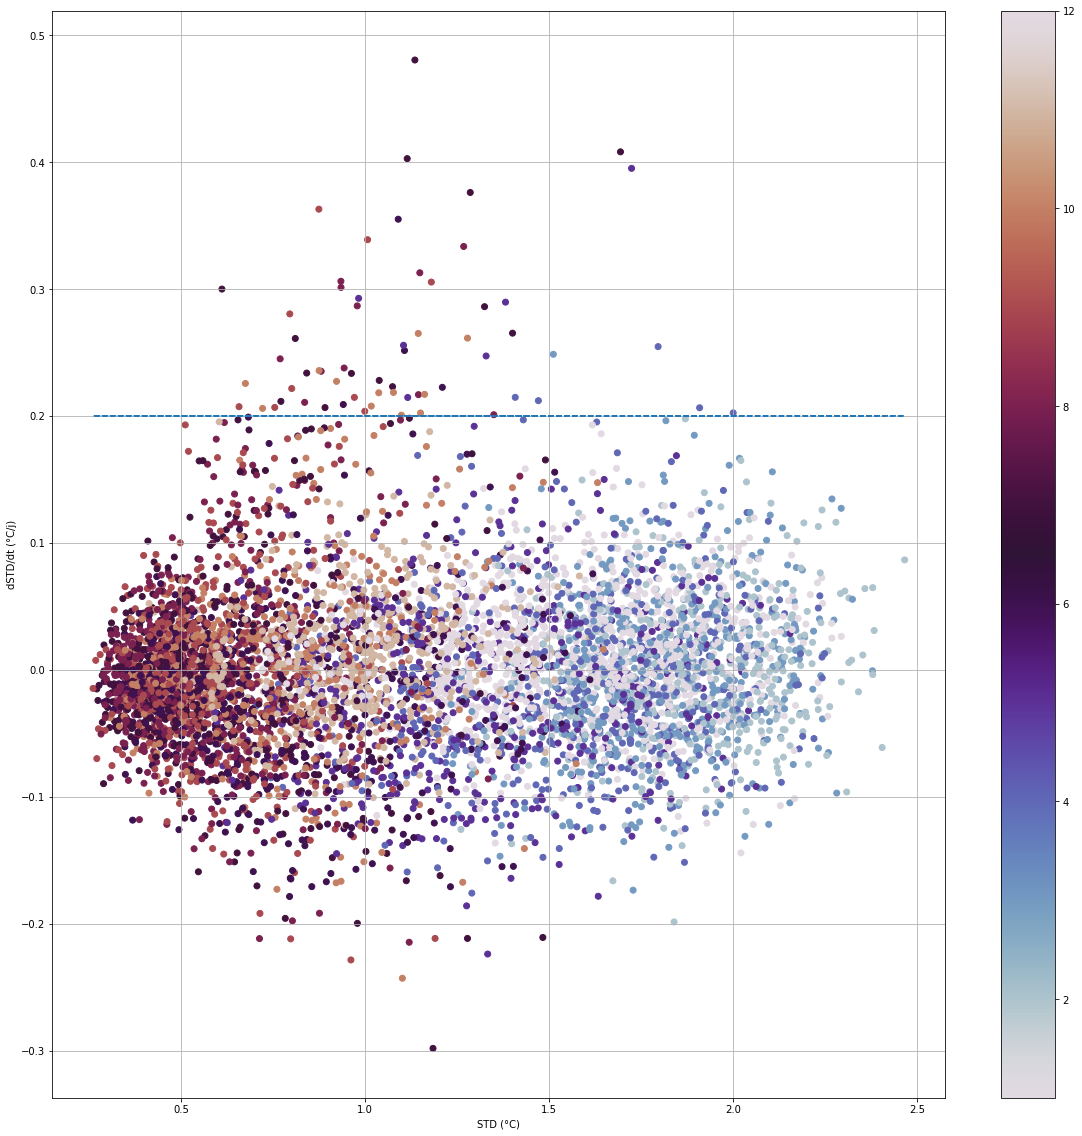

In [ ]:
variation_std = np.diff(output_std.std_sst)
# print(variation_std)
# print(np.shape(output_std.std_sst[1:]),np.shape(variation_std))
plt.scatter(output_std.std_sst[1:],variation_std, c = output_std.month[1:],cmap = 'twilight')
plt.colorbar()
plt.plot(output_std.std_sst, np.ones(len(variation_std)+1)*0.2,'--')
plt.ylabel('dSTD/dt (°C/j)')
plt.xlabel('STD (°C)')
plt.grid()

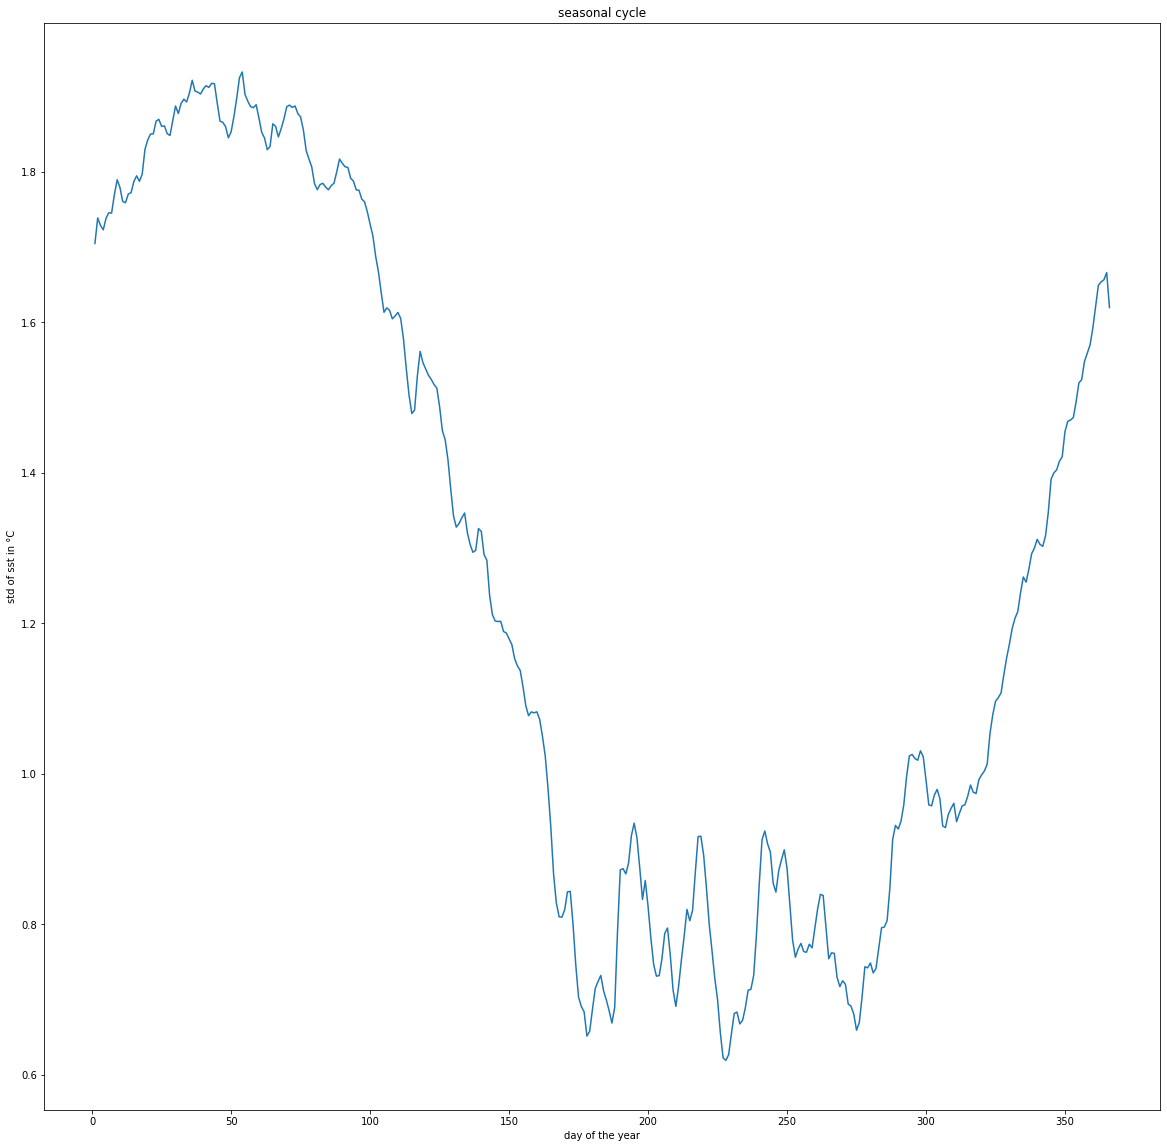

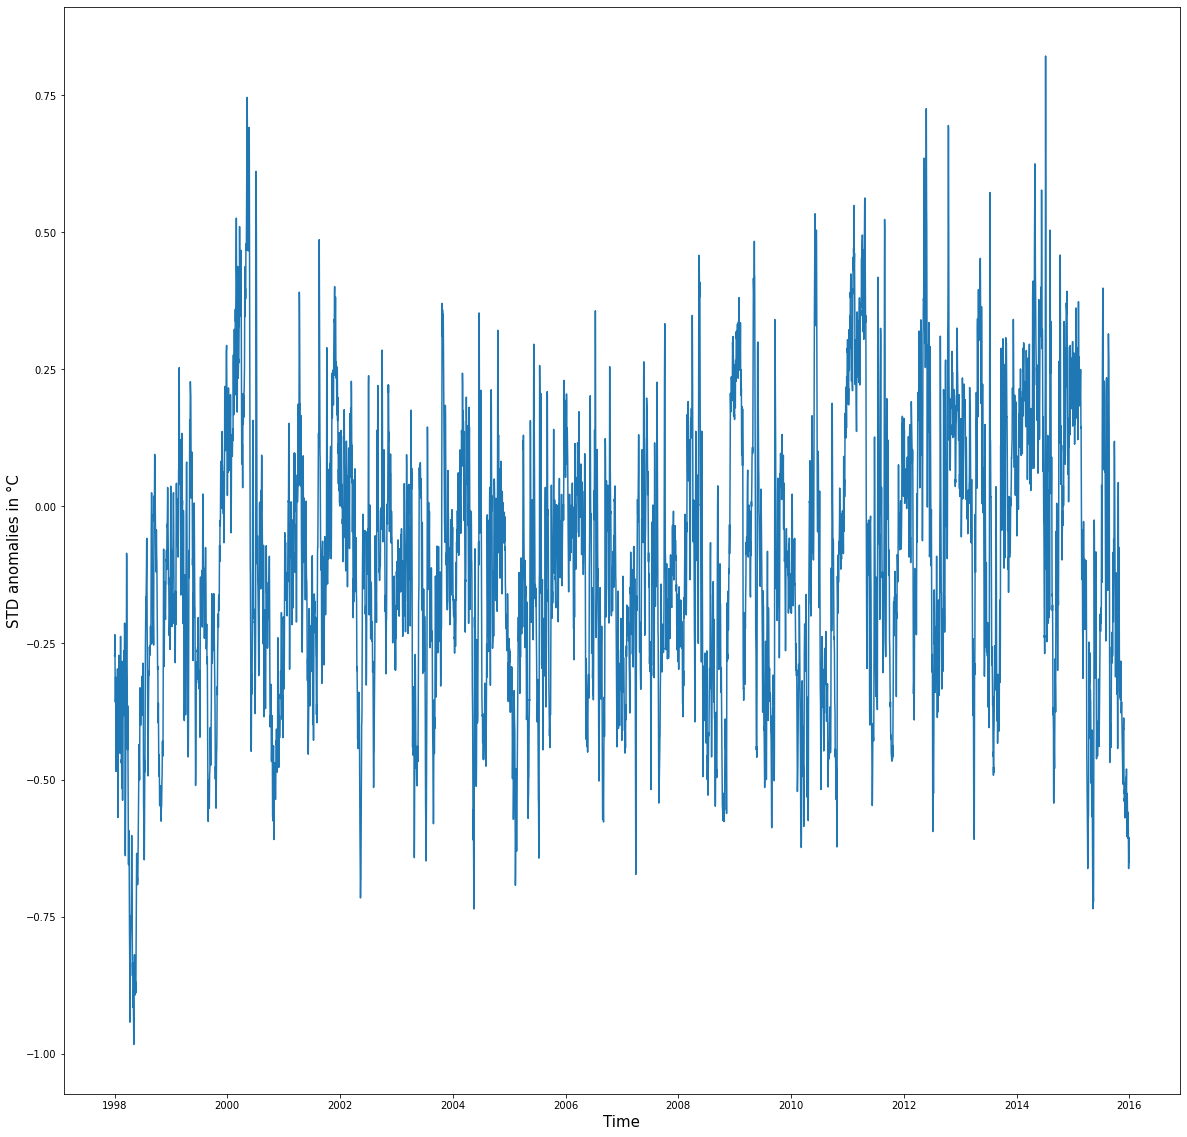

In [ ]:
std_wo_seasons =[]
plt.figure()
plt.plot(seasonal_std.dayofyear, seasonal_std.std_sst,'-')
plt.title('seasonal cycle')
plt.xlabel('day of the year')
plt.ylabel('std of sst in °C')
for j in range(len(output_std.std_sst)):
  std_wo_seasons.append(output_std.std_sst[j] - seasonal_std.std_sst[np.where(seasonal_std.dayofyear == output_std.dayofyear[j])[0]])
std_wo_seasons = np.array(std_wo_seasons)
plt.figure()
plot_ts(output_std.time,std_wo_seasons,'-','STD anomalies in °C')

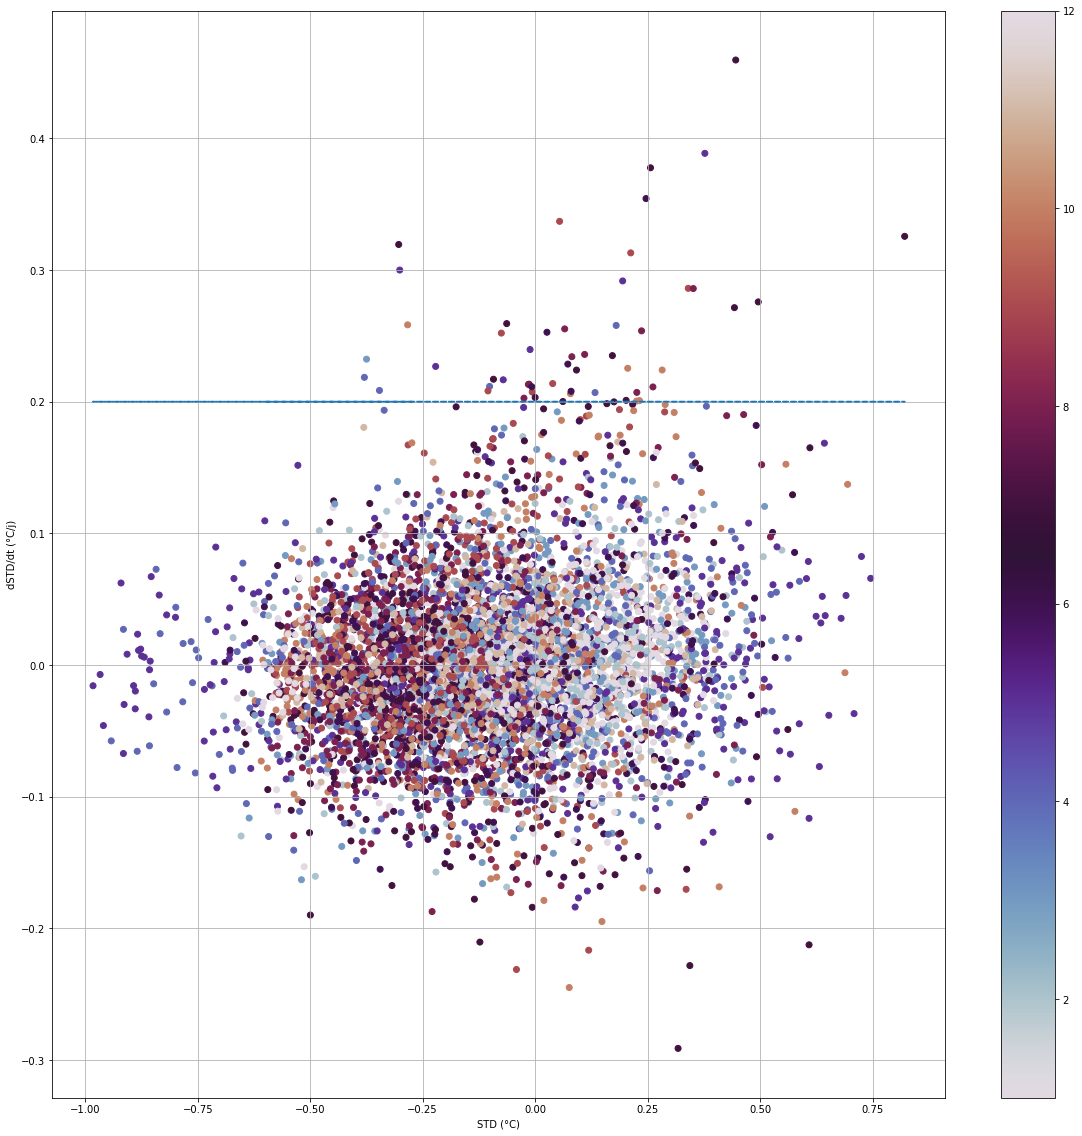

In [ ]:
variation_std_season = std_wo_seasons[1:] - std_wo_seasons[:-1]
plt.scatter(std_wo_seasons[1:],std_wo_seasons[1:] - std_wo_seasons[:-1], c = output_std.month[1:],cmap = 'twilight')
plt.colorbar()
plt.plot(std_wo_seasons[:-1], np.ones(len(std_wo_seasons[1:]))*0.2,'--')
plt.ylabel('dSTD/dt (°C/j)')
plt.xlabel('STD (°C)')
plt.grid()

Text(0.5, 1.0, 'Potential Typhoons depending on the month between 1998 and 2014 (using std anomalies)')

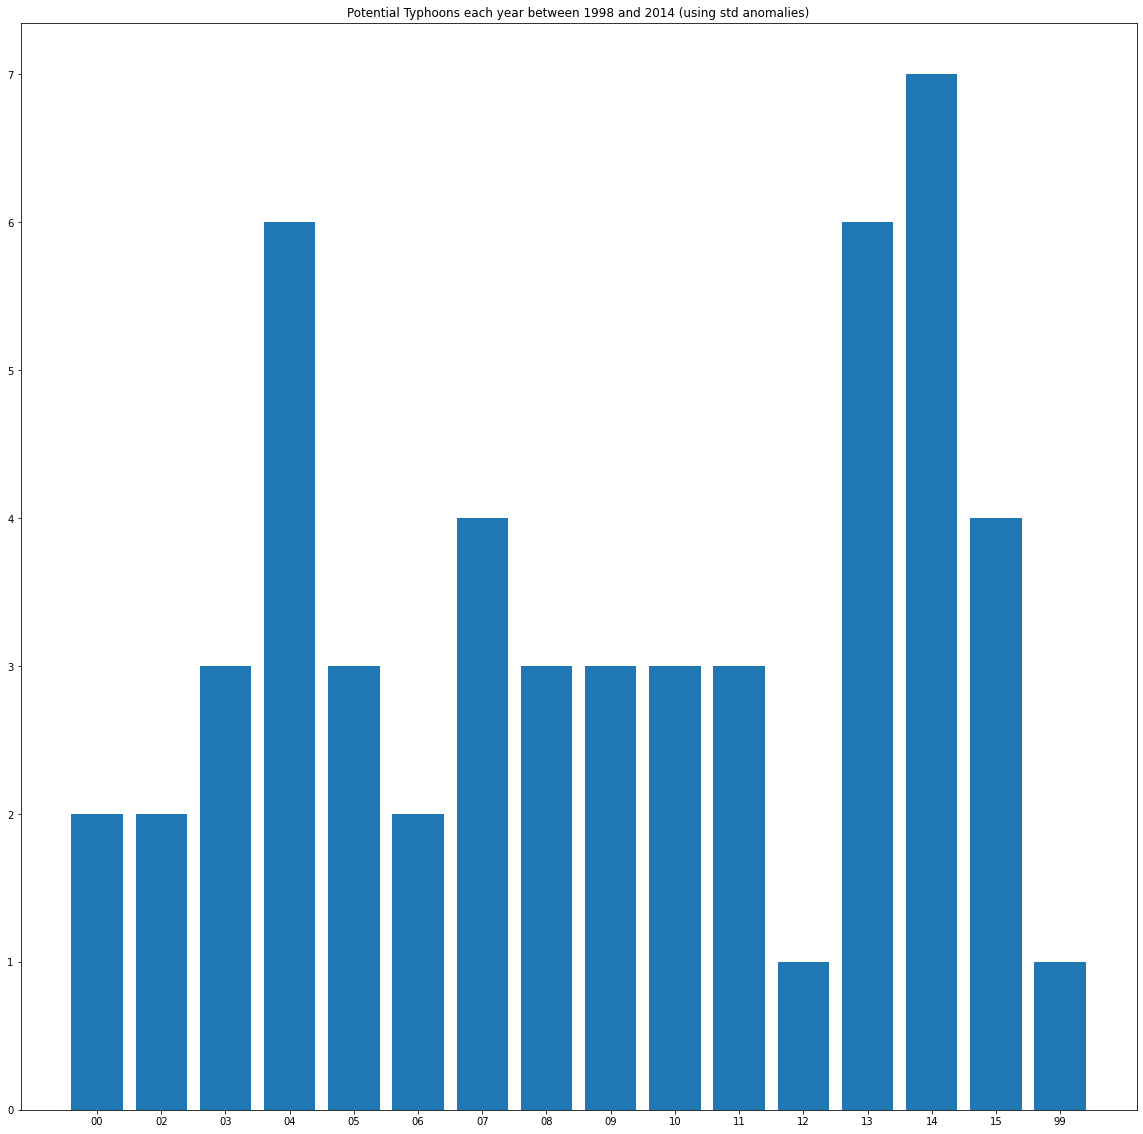

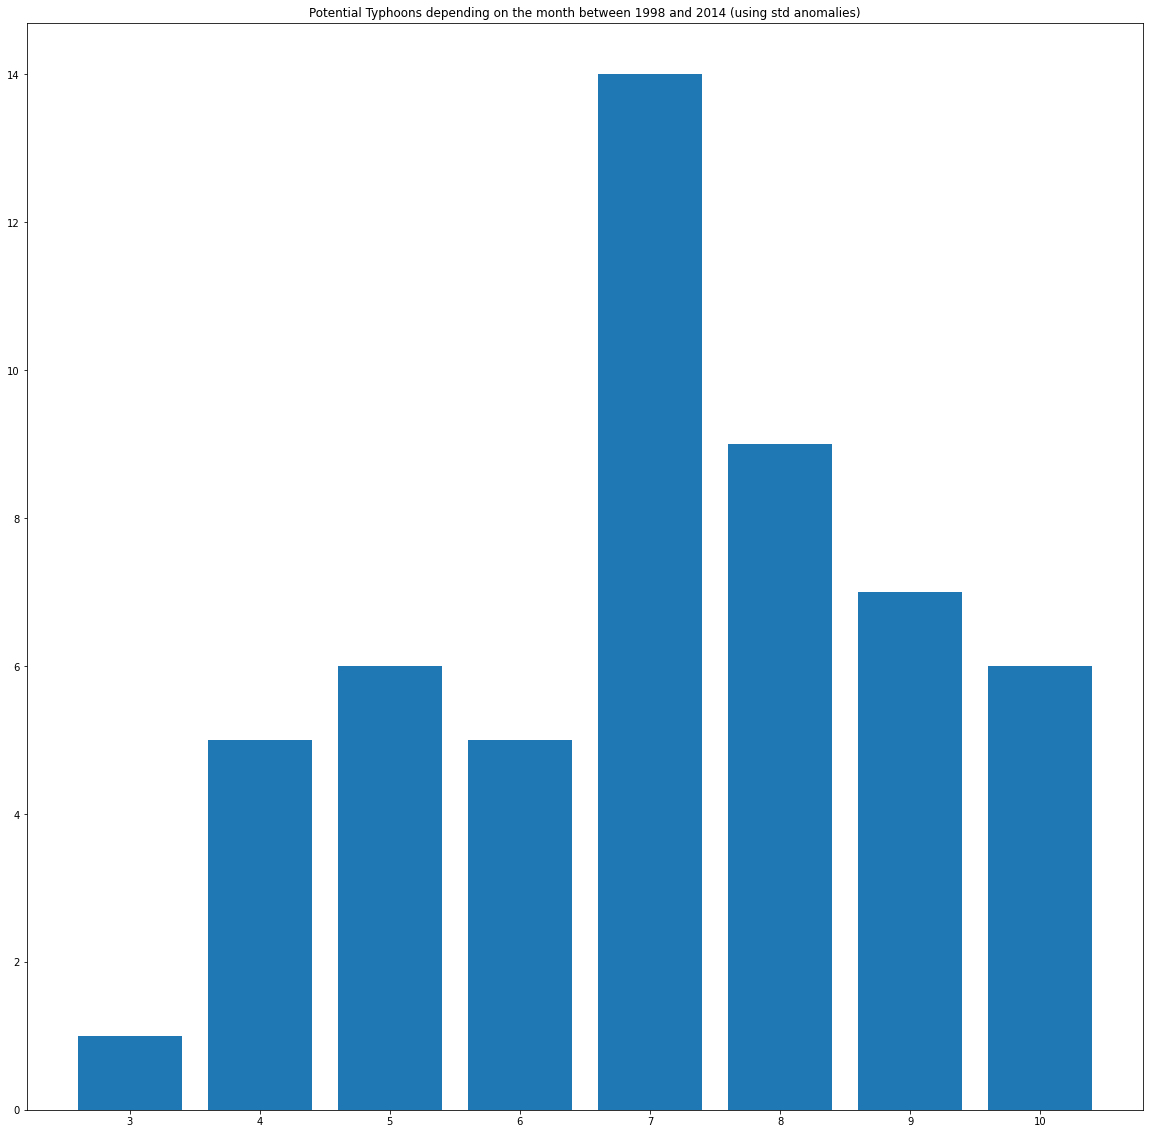

In [ ]:
maybe_typhoons_std = [output_std.time[i+1] for i in np.where(variation_std_season>0.2)[0]]
maybe_typhoons_std_month = [output_std.month[i+1] for i in np.where(variation_std_season>0.2)[0]]
labels, counts = np.unique([datetime.date.fromordinal(int(d)).strftime("%y") for d in maybe_typhoons_std], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Potential Typhoons each year between 1998 and 2014 (using std anomalies)')
plt.figure()
labels, counts = np.unique([int(m) for m in maybe_typhoons_std_month], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Potential Typhoons depending on the month between 1998 and 2014 (using std anomalies)')

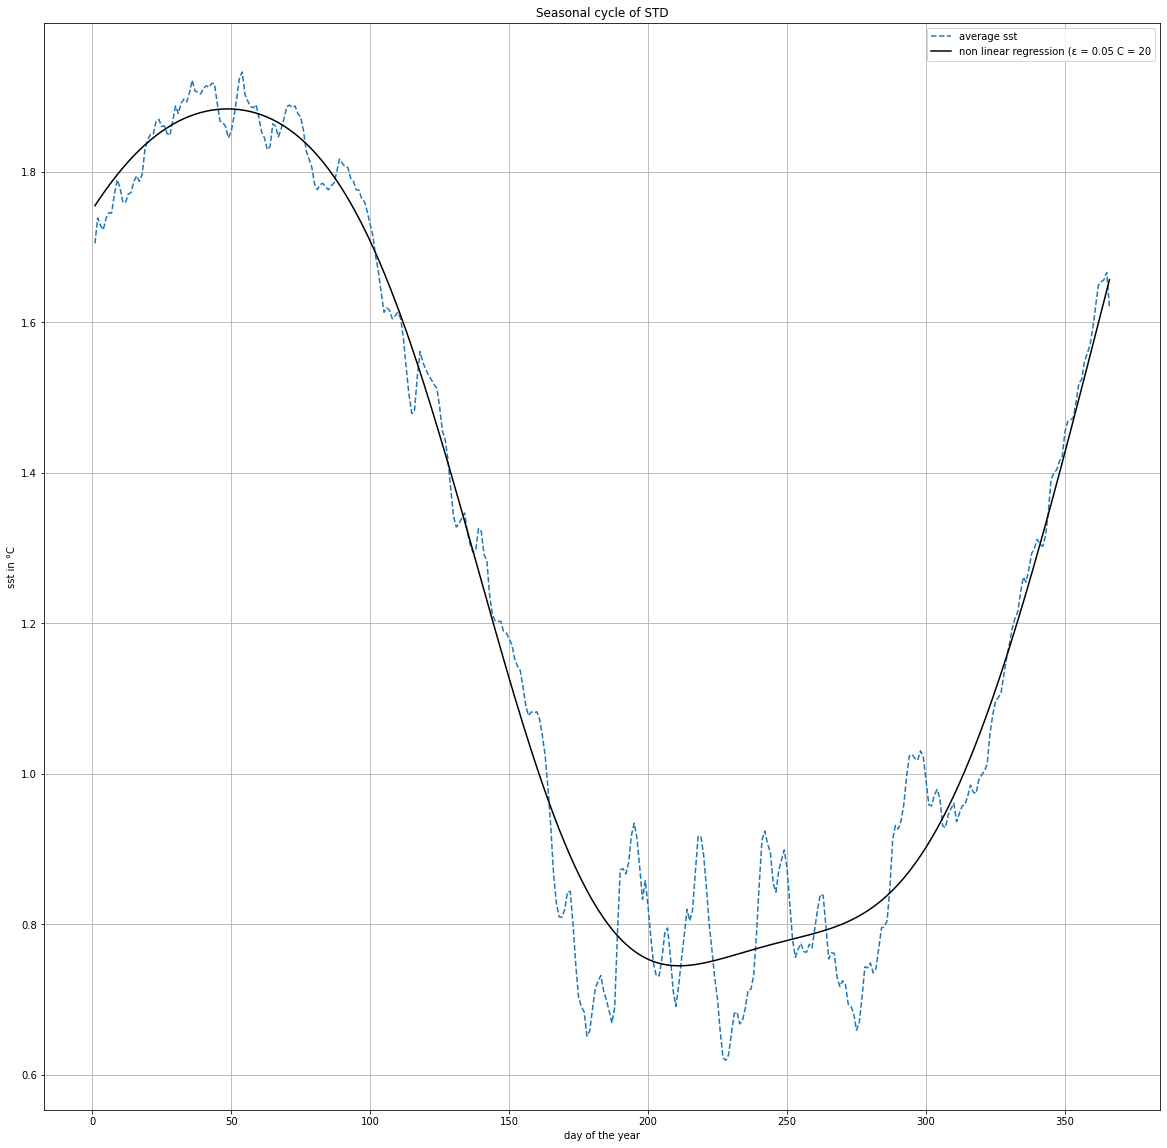

In [ ]:
from sklearn.svm import SVR
# specify epsilon: the half-width of the "corridor" of data around the fitted line
epsilon = .05
# specify the regularisation parameter, C:
C=20
t = seasonal_std.dayofyear
y = seasonal_std.std_sst
# set up and fit the model
model=SVR(C=C, epsilon=epsilon).fit(t[:,None],y)

# predict values of ŷ
y_hat=model.predict(t[:,None])

# plot the results
plt.plot(t,y,'--', label ='average sst')
plt.plot(t,y_hat,'k-',label = 'non linear regression (ε = {} C = {}'.format(epsilon,C))
plt.xlabel('day of the year')
plt.ylabel('sst in °C')
plt.title('Seasonal cycle of STD')
plt.legend()
plt.grid()


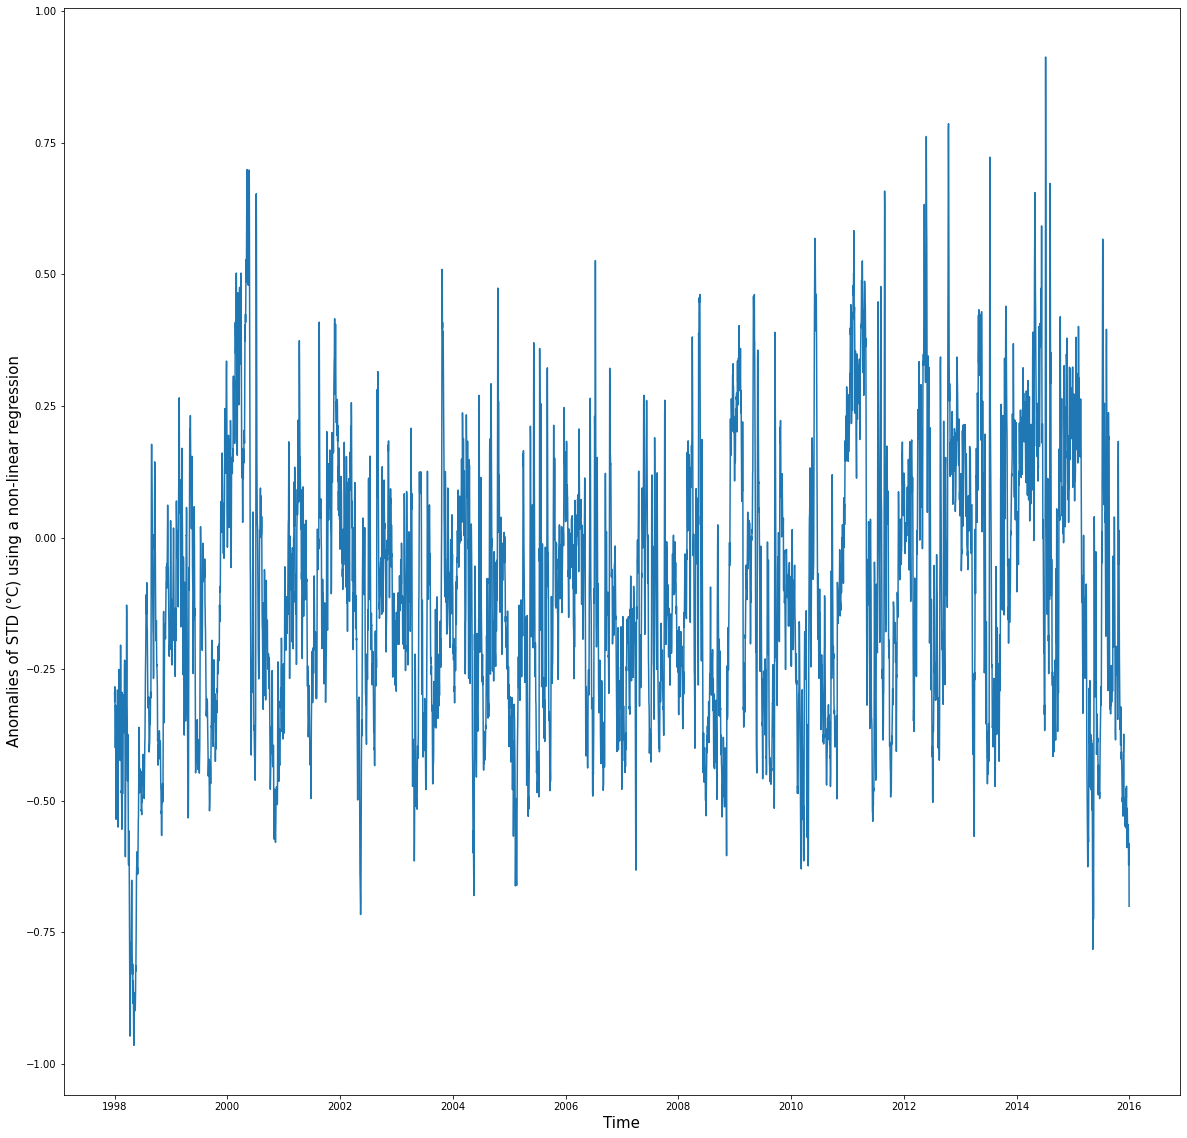

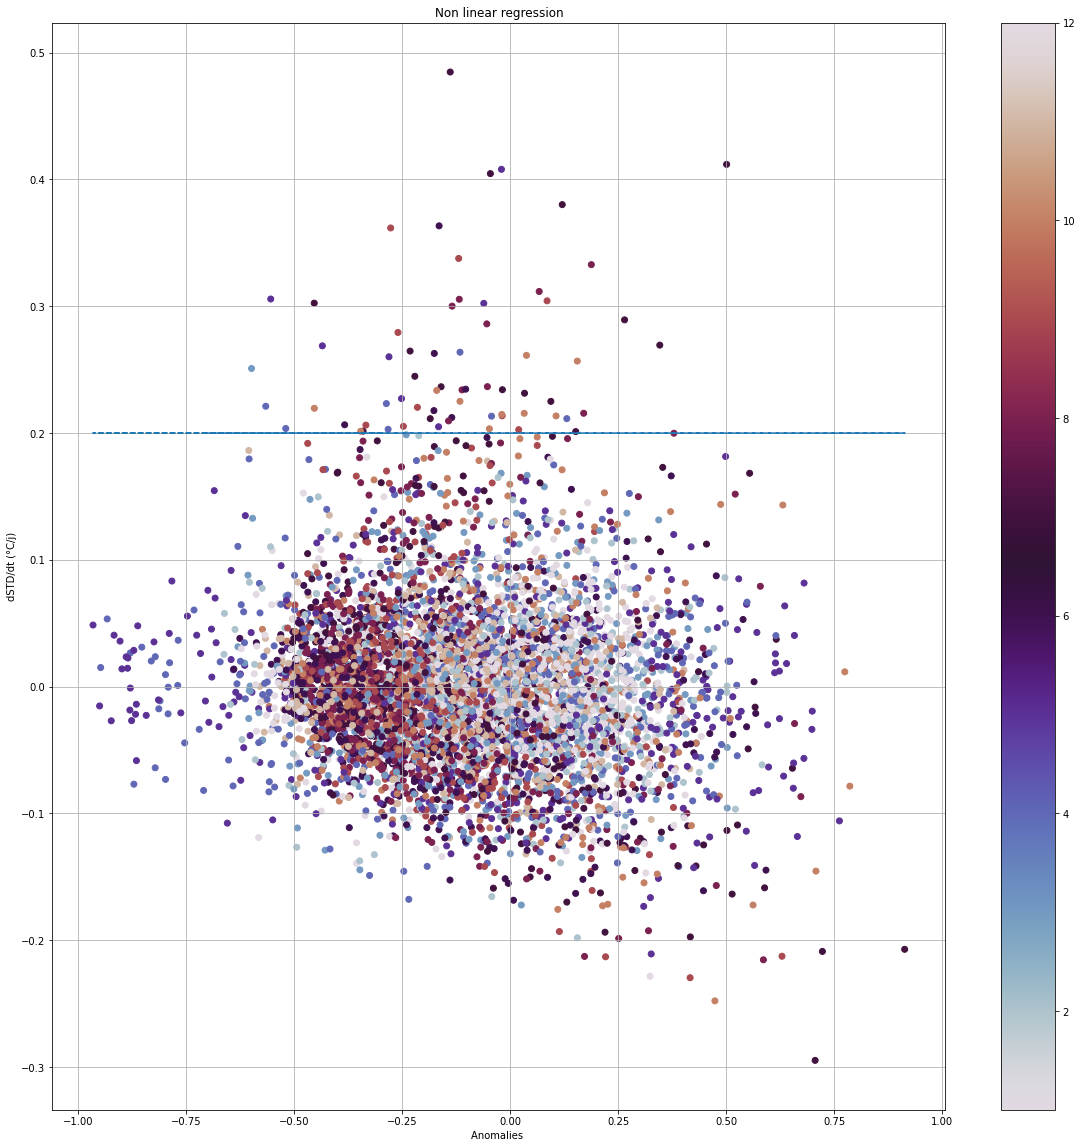

In [ ]:
std_reg =[]
for j in range(len(output_std)):
  std_reg.append(output_std.std_sst[j] - y_hat[int(output_std.dayofyear[j])-1])
std_reg = np.array(std_reg)
plot_ts(output_std.time,std_reg,'-','Anomalies of STD (°C) using a non-linear regression')
plt.figure()
variation_reg_std = std_reg[1:] - std_reg[:-1]
# print(np.shape(std_reg[1:]),np.shape(variation_reg_std),np.shape(np.diff(output1.time)))
plt.scatter(std_reg[:-1],variation_reg_std, c = output_std.month[:-1],cmap = 'twilight')
plt.colorbar()

plt.plot(std_reg, np.ones(len(std_reg))*.20,'--')
plt.ylabel('dSTD/dt (°C/j)')
plt.xlabel('Anomalies ')
plt.title('Non linear regression')
plt.grid()



Text(0.5, 1.0, 'Potential Typhoons depending on the month between 1998 and 2014 (using std and a non linear regression)')

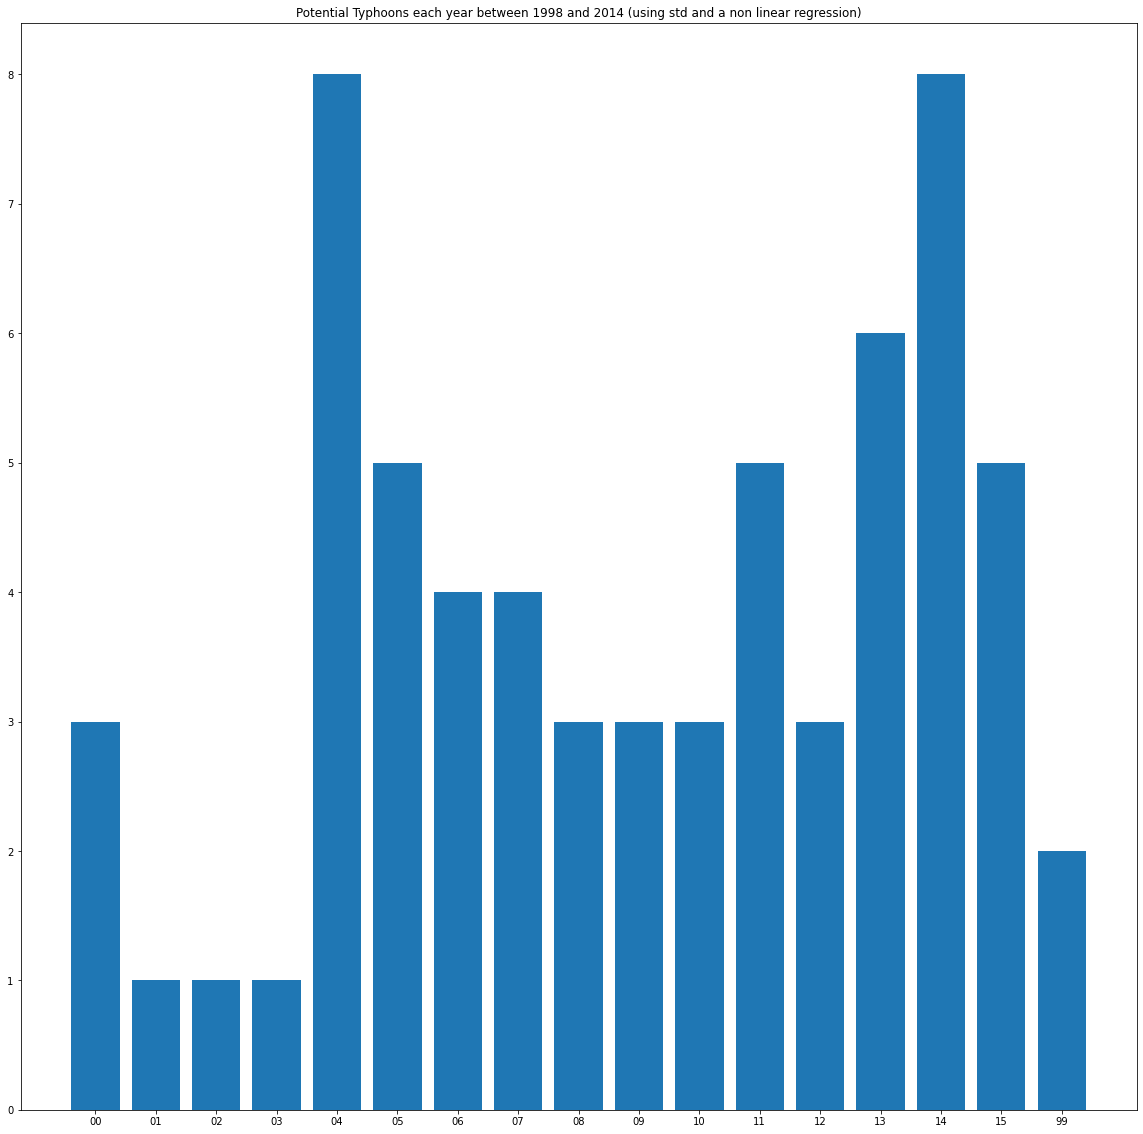

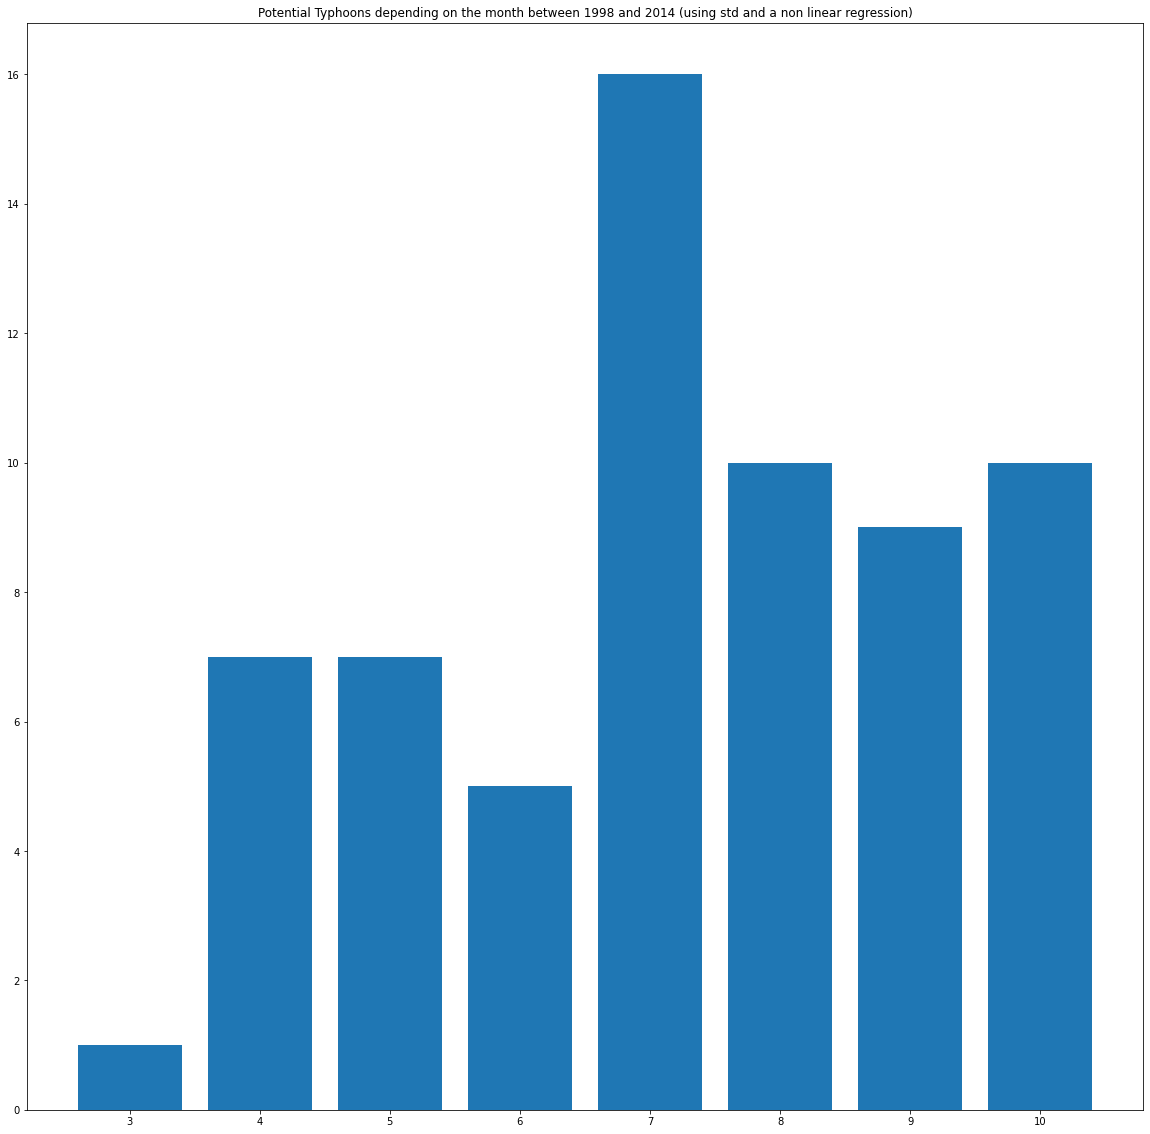

In [ ]:
maybe_typhoons_reg = [output_std.time[i+1] for i in np.where(variation_reg_std > 0.2)[0]]
maybe_typhoons_reg_month = [output_std.month[i+1] for i in np.where(variation_reg_std > 0.2)[0]]
labels, counts = np.unique([datetime.date.fromordinal(int(d)).strftime("%y") for d in maybe_typhoons_reg], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Potential Typhoons each year between 1998 and 2014 (using std and a non linear regression)')
plt.figure()
labels, counts = np.unique([int(m) for m in maybe_typhoons_reg_month], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Potential Typhoons depending on the month between 1998 and 2014 (using std and a non linear regression)')

### **Using the median (not efficient)**

In [ ]:
%%bigquery --project alert-ground-261008 seasonal_med
SELECT dayofyear, APPROX_QUANTILES(sst, 100)[OFFSET(50)] AS median
FROM bdo2020.bdo2020.1998_2015_withtimes
WHERE lon>125 AND lon<140 AND lat>20 AND lat<28
GROUP BY dayofyear
ORDER BY dayofyear

In [ ]:
%%bigquery --project alert-ground-261008 output_med
SELECT time, dayofyear, month, APPROX_QUANTILES(sst, 1000)[OFFSET(500)] AS median
FROM bdo2020.bdo2020.1998_2015_withtimes
WHERE lon>125 AND lon<140 AND lat>20 AND lat<28
GROUP BY time, dayofyear, month
ORDER BY time

[ 0.   -0.15  0.   ... -0.15 -0.15  0.  ]


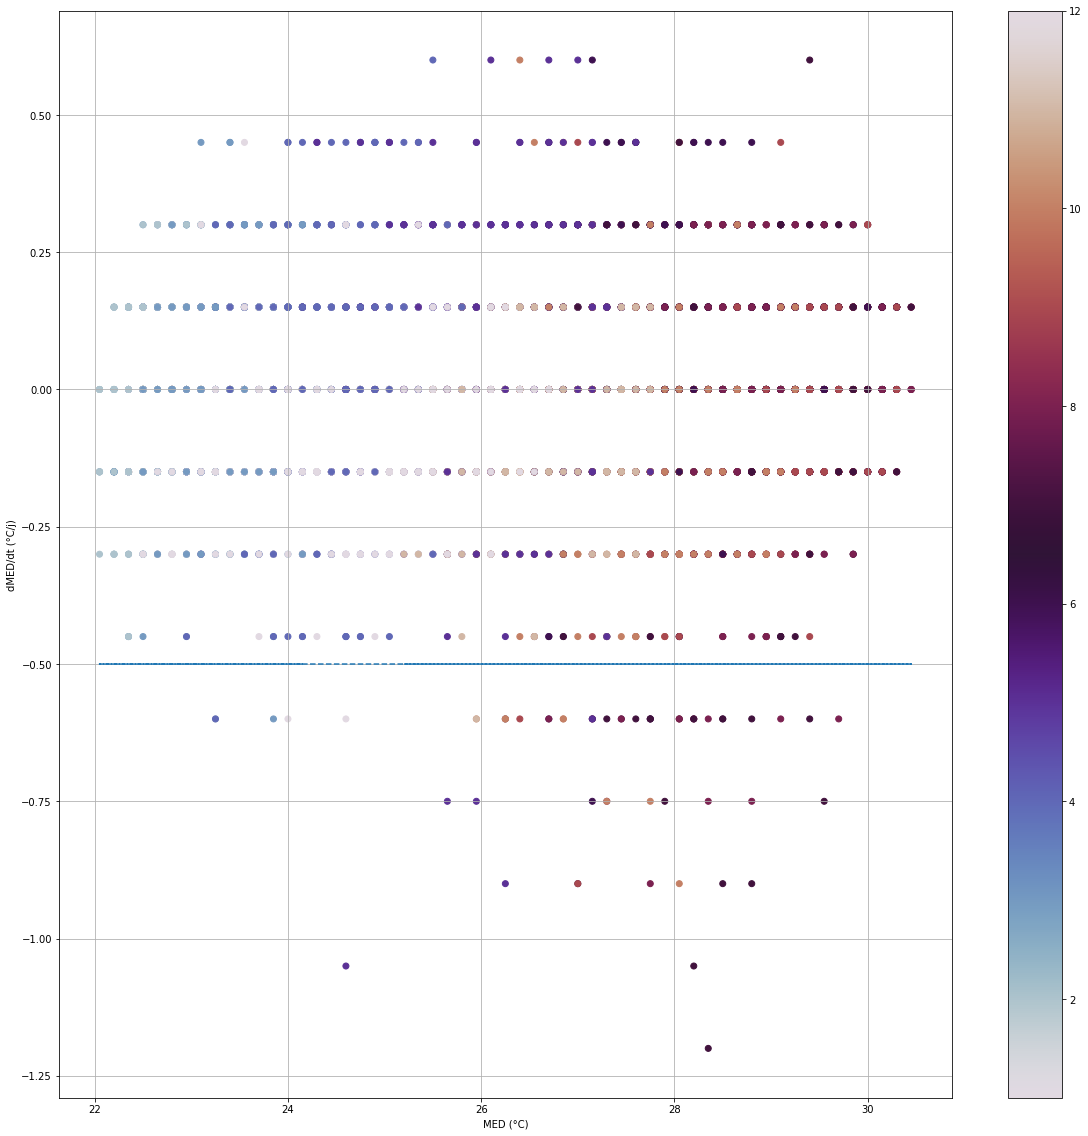

In [ ]:
med_out = output_med['median'].values
med_out_season = seasonal_med['median'].values
variation_med = np.diff(med_out) 
print(variation_med)
plt.scatter(med_out[1:],variation_med/np.diff(output_med.time), c = output_med.month[1:],cmap = 'twilight')
plt.colorbar()
plt.plot(med_out, np.ones(len(variation_med)+1)*-0.5,'--')
plt.ylabel('dMED/dt (°C/j)')
plt.xlabel('MED (°C)')
plt.grid()

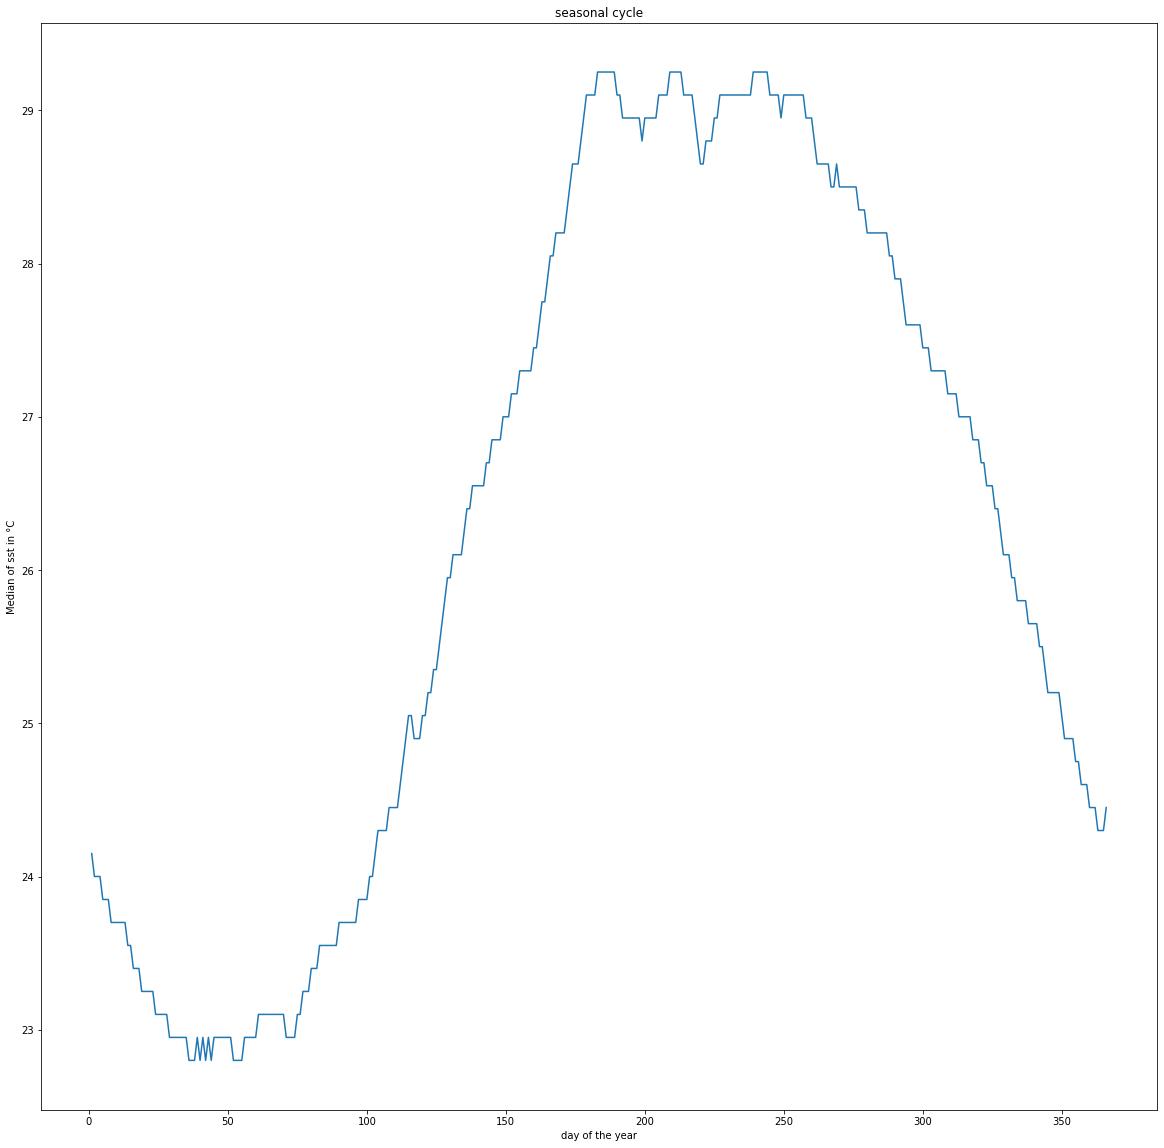

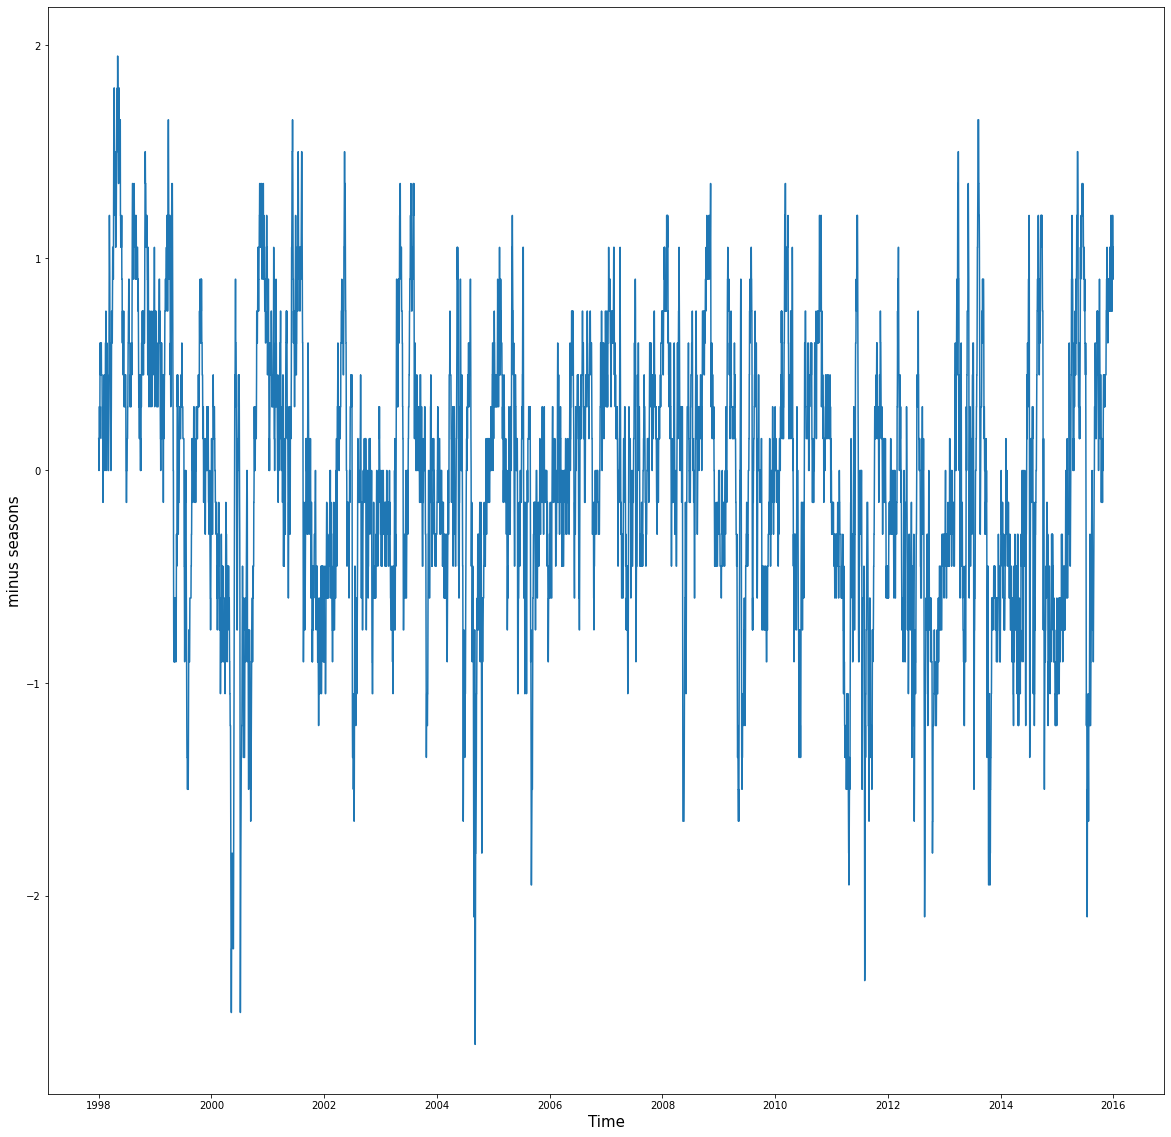

In [ ]:
med_wo_seasons =[]
plt.figure()
plt.plot(seasonal_med.dayofyear, med_out_season,'-')
plt.title('seasonal cycle')
plt.xlabel('day of the year')
plt.ylabel('Median of sst in °C')
for j in range(len(med_out)):
  med_wo_seasons.append(float(med_out[j] - med_out_season[np.where(seasonal_med.dayofyear == output_med.dayofyear[j])[0]]))
plt.figure()
plot_ts(output_med.time,med_wo_seasons,'-','minus seasons')

6573


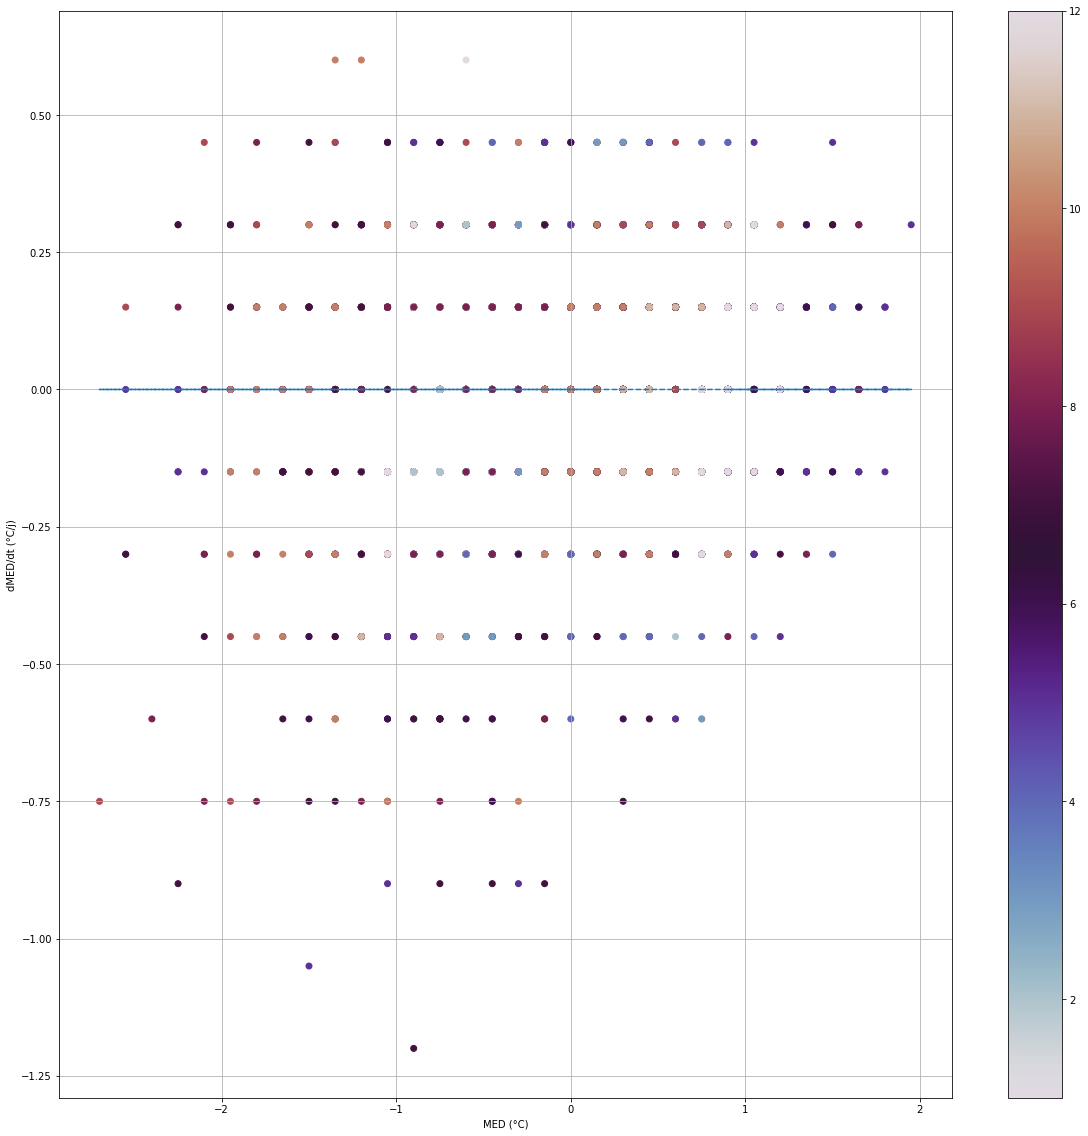

In [ ]:
variation_med_season = np.diff(array(med_wo_seasons))
print(len(variation_med_season))
plt.scatter(med_wo_seasons[1:],variation_med_season, c = output_med.month[1:],cmap = 'twilight')
plt.colorbar()
plt.plot(med_wo_seasons[:-1], np.ones(len(med_wo_seasons[1:]))*0.,'--')
plt.ylabel('dMED/dt (°C/j)')
plt.xlabel('MED (°C)')
plt.grid()

### **Generate a gif file of the evolution of a typhoon**

In this part, we aimed at generating a gif file of the evoultion of a specific typhoon named Chaba and which occured in the late summer of 2004 (mid august to mid september).

In [ ]:
%%bigquery --project alert-ground-261008 output1
SELECT lon, lat, time, AVG(sst) AS mean_sst
FROM bdo2020.bdo2020.1998_2015_withtimes
WHERE lon > 120 AND lon < 145 AND lat > 8 AND lat < 28 AND year = 2004 AND (weekofyear = 33 OR weekofyear = 34 OR weekofyear = 35) 
GROUP BY lon, lat, time
ORDER BY time

In [ ]:
import numpy as np
import imageio
from PIL import Image 
import os
from google.colab import files
import datetime

In [ ]:
filenames = []
for d in range(int(output1.time[0]), int(output1.time[len(output1.time) - 1])):
  figure()
  
  # plot_im  
  lon = output1.lon[np.where(output1.time == d)[0]]
  lat = output1.lat[np.where(output1.time == d)[0]]
  im = output1.mean_sst[np.where(output1.time == d)[0]]

  size_points = 50
  var_name='Sea Surface Temperature'

  if lon.max() - lon.min() < 100:
    # Mercator projection (for small zone)
    m = Basemap(projection = 'merc', llcrnrlat = nanmin(lat), urcrnrlat = nanmax(lat),\
              llcrnrlon = nanmin(lon), urcrnrlon = nanmax(lon), lat_0 = (nanmax(lat) + nanmin(lat))*0.5,\
              lon_0 = (nanmax(lon) + nanmin(lon))*0.5, resolution = 'l')

  else:
    # Orthogonal projection (for large zone)
    m = Basemap(projection = 'ortho', lat_0 = 0, lon_0 = 0, resolution = 'l')

  # transform (lon,lat) to (x,y)
  x,y = m(lon,lat)

  # plot
  im = ma.masked_where(isnan(im), im)
  res = m.scatter(x, y, size_points, im, 'o', alpha = 1, cmap = 'jet', lw = 0, vmin = 21, vmax = 31)
  m.drawcoastlines()
  m.fillcontinents()
  parallels = linspace(nanmin(lat), nanmax(lat), 15)
  meridians = linspace(nanmin(lon), nanmax(lon), 15)
  cb = m.colorbar(res, location = "right")
  cb.set_label(var_name, fontsize = 15)
  plt.title('Date : %s' % (datetime.date.fromordinal(d).strftime("%d/%m/%Y")))	

  # Save Images
  filename = f'{d}.png'
  filenames.append(filename)
  
  # save frame
  plt.savefig(filename)
  plt.close()
  
# build gif
img, *imgs = [Image.open(f) for f in filenames]
img.save('Chaba_2004.gif', format = 'GIF', append_images = imgs, save_all = True, duration = 150, loop = 0)
files.download('Chaba_2004.gif')

# Remove files
for filename in set(filenames):
    os.remove(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Tracking the minimum of SST**

In this part, we also worked on the Chaba typhoon.

In [ ]:
%%bigquery --project alert-ground-261008 output2
SELECT lon, lat, time, sst
FROM bdo2020.bdo2020.1998_2015_withtimes
WHERE lon > 120 AND lon < 145 AND lat > 8 AND lat < 28 AND year = 2004 AND (weekofyear = 33 OR weekofyear = 34 OR weekofyear = 35) 
ORDER BY time

In [ ]:
last_index = 0
index_list = [0]
while last_index < (len(output2) - 1) :
  last_index = (np.where(output2.time == output2.time[last_index + 1]))[0][-1]
  index_list.append(last_index)

liste_range_index = [[range(0, index_list[0] + 1)]]

for i in range(len(index_list) - 1) :
  liste_range_index.append([range(index_list[i] + 2, index_list[i + 1] + 1)])

##
index_min = [] # correspond à la liste des indices de output2 pour lesquelles on a un min de sst (découpage en journées)
for i in range(len(index_list) - 1) :
  index_min.append(output2[index_list[i] : index_list[i + 1]]['sst'].idxmin())

# print(output2.lat[index_min[0]]) #ici latitude pour laquelle on a un minimum de sst pour journée 1
# print(output2.lon[index_min[0]]) #ici longitude pour laquelle on a un minimum de sst pour journée 1

lons = []
lats = []
for i in range(len(index_min) - 1) :
  lons.append(output2.lon[i])
  lats.append(output2.lat[i])


In [ ]:
filenames = []

for i in range(int(output2.time[0]), int(output2.time[len(output2.time) - 1])):
  figure()

  lon = output2.lon[np.where(output2.time == i)[0]]
  lat = output2.lat[np.where(output2.time == i)[0]]
  im = output2.sst[np.where(output2.time == i)[0]]

  lon=array(lon)
  lat=array(lat)
  im=array(im)

  size_points = 50
  var_name = ''

  if lon.max() - lon.min() < 100:
    # Mercator projection (for small zone)
    m = Basemap(projection = 'merc', llcrnrlat = nanmin(lat), urcrnrlat = nanmax(lat),\
              llcrnrlon = nanmin(lon), urcrnrlon = nanmax(lon), lat_0 = (nanmax(lat) + nanmin(lat))*0.5,\
              lon_0 = (nanmax(lon) + nanmin(lon))*0.5, resolution = 'l')

  else:
    # Orthogonal projection (for large zone)
    m = Basemap(projection = 'ortho', lat_0 = 0, lon_0 = 0, resolution = 'l')

  # transform (lon,lat) to (x,y)
  x, y = m(lon, lat)

  # plot
  im = ma.masked_where(isnan(im),im)
  res = m.scatter(x, y, size_points, im, 'o', alpha = 1, cmap = 'inferno', lw = 0, vmin = 21, vmax = 31)
  m.drawcoastlines()
  m.fillcontinents()
  parallels = linspace(nanmin(lat),nanmax(lat),15)
  meridians = linspace(nanmin(lon),nanmax(lon),15)
  cb = m.colorbar(res, location = "right")
  cb.set_label(var_name, fontsize = 15)
  X, Y = m(lons[i - int(output2.time[0])], lats[i - int(output2.time[0])])
  m.plot(X, Y, 'bo', markersize = 12)
  plt.title('Tracking of the minimum of the Sea Surface Temperature - Date : %s' % (datetime.date.fromordinal(i).strftime("%d/%m/%Y")))

  # Save Images
  filename = f'{i}.png'
  filenames.append(filename)
  
  # save frame
  plt.savefig(filename)
  plt.close()
  
# build gif
img, *imgs = [Image.open(f) for f in filenames]
img.save('Typhon_2005_suivi_mininum_SST.gif', format = 'GIF', append_images = imgs, save_all = True, duration = 500, loop = 0)
files.download('Typhon_2005_suivi_mininum_SST.gif')

# Remove files
for filename in set(filenames):
    os.remove(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>